# Suicide analysis by Gender and Age range 15-24


## Import data and preprocessing

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import scipy.cluster.hierarchy as hac
from datetime import datetime
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#For Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#For Google Colab
path = "/content/drive/My Drive/Colab Notebooks/"
file1 = "57_countries.csv"
df = pd.read_csv(path+file1)

df.head()


country  year   sex  ... 35-54 years  55-74 years  75+ years
0  Argentina  1985  male  ...           0            0        202
1  Argentina  1985  male  ...           0          485          0
2  Argentina  1985  male  ...         414            0          0
3  Argentina  1985  male  ...           0            0          0
4  Argentina  1985  male  ...           0            0          0

[5 rows x 34 columns]

In [ ]:
ager = df["age"].unique()
ager.sort()
lst = [ager[3], ager[0], ager[1], ager[2], ager[4], ager[5]]
lst

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

In [ ]:
# #DIVISION OF DF BY AGE RANGE
df15 = df[df["age"] == lst[1]]
df15 = df15.reset_index(drop=True)

In [ ]:
male_df = df15[df15["sex"] == "male"]
male_df = male_df.reset_index(drop=True)
female_df = df15[df15["sex"] == "female"]
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df

country  year   sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  male  ...           0            0          0
1     Argentina  1986  male  ...           0            0          0
2     Argentina  1987  male  ...           0            0          0
3     Argentina  1988  male  ...           0            0          0
4     Argentina  1989  male  ...           0            0          0
...         ...   ...   ...  ...         ...          ...        ...
1649    Uruguay  2010  male  ...           0            0          0
1650    Uruguay  2012  male  ...           0            0          0
1651    Uruguay  2013  male  ...           0            0          0
1652    Uruguay  2014  male  ...           0            0          0
1653    Uruguay  2015  male  ...           0            0          0

[1654 rows x 34 columns]

In [ ]:
print(len(male_df))
print(len(female_df))

1654
1654


In [ ]:
male_df.isnull().sum()

country                         0
year                            0
sex                             0
age                             0
suicides_no                     0
population                      0
suicides/100k pop               0
country-year                    0
 gdp_for_year ($)               0
gdp_per_capita ($)              0
generation                      0
Country-Age-sex                 0
Total_suicides                  0
Total_population                0
Max_Suicide                     0
Max_Population                  0
Min_suicides                    0
min_population                  0
Mean_suicides                   0
Mean_population                 0
GDP_percentage_growth           0
Population_percentage_growth    0
SPPI                            0
countrylabel                    0
sexlabel                        0
agelabel                        0
genlabels                       0
Country-Age-sex-range           0
5-14 years                      0
15-24 years   

In [ ]:
male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)

In [ ]:
female_df

country  year     sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  female  ...           0            0          0
1     Argentina  1986  female  ...           0            0          0
2     Argentina  1987  female  ...           0            0          0
3     Argentina  1988  female  ...           0            0          0
4     Argentina  1989  female  ...           0            0          0
...         ...   ...     ...  ...         ...          ...        ...
1649    Uruguay  2010  female  ...           0            0          0
1650    Uruguay  2012  female  ...           0            0          0
1651    Uruguay  2013  female  ...           0            0          0
1652    Uruguay  2014  female  ...           0            0          0
1653    Uruguay  2015  female  ...           0            0          0

[1654 rows x 34 columns]

In [ ]:
male_df.set_index('year', inplace = True)
male_df.sort_values(by = ['year', 'country'], inplace = True)
male_df.sort_index(inplace = True)
female_df.set_index('year', inplace = True)
female_df.sort_values(by = ['year', 'country'], inplace = True)
female_df.sort_index(inplace = True)

In [ ]:
male_df

country   sex          age  ...  35-54 years  55-74 years  75+ years
year                                  ...                                     
1985    Argentina  male  15-24 years  ...            0            0          0
1985    Australia  male  15-24 years  ...            0            0          0
1985      Austria  male  15-24 years  ...            0            0          0
1985     Barbados  male  15-24 years  ...            0            0          0
1985      Belgium  male  15-24 years  ...            0            0          0
...           ...   ...          ...  ...          ...          ...        ...
2016    Mauritius  male  15-24 years  ...            0            0          0
2016  Netherlands  male  15-24 years  ...            0            0          0
2016      Romania  male  15-24 years  ...            0            0          0
2016       Sweden  male  15-24 years  ...            0            0          0
2016     Thailand  male  15-24 years  ...            0            0          0

[1654 rows x 33 columns]

In [ ]:
## Total No of Suicides
targets = male_df.columns[3:4]
country = male_df["country"].unique()
## Total No of Suicides
fetargets = female_df.columns[3:4]
fecountry = female_df["country"].unique()



In [ ]:
targets

Index(['suicides_no'], dtype='object')

### 1 A. Extract time series for each country

Men range 15-24 year Argentina 's suicides_no


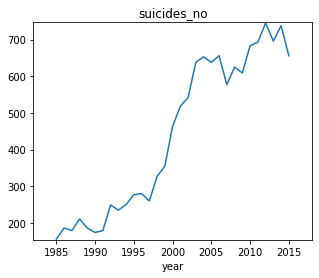

Men range 15-24 year Australia 's suicides_no


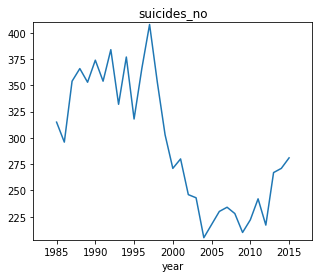

Men range 15-24 year Austria 's suicides_no


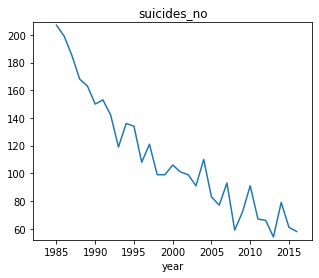

Men range 15-24 year Barbados 's suicides_no


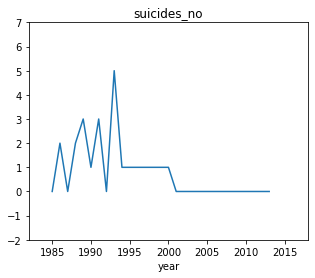

Men range 15-24 year Belgium 's suicides_no


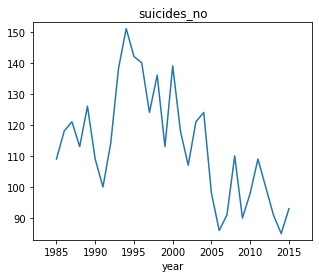

Men range 15-24 year Brazil 's suicides_no


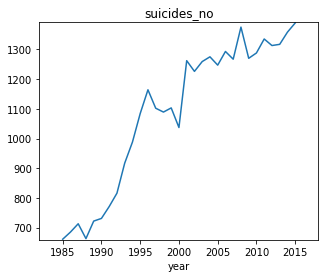

Men range 15-24 year Bulgaria 's suicides_no


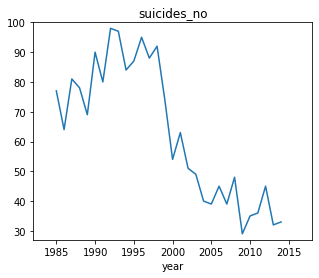

Men range 15-24 year Canada 's suicides_no


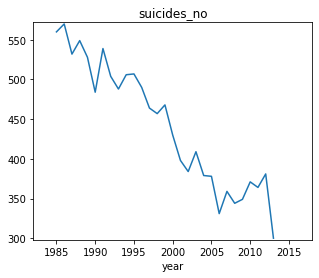

Men range 15-24 year Chile 's suicides_no


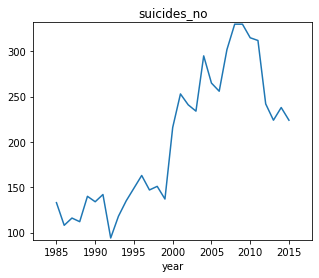

Men range 15-24 year Colombia 's suicides_no


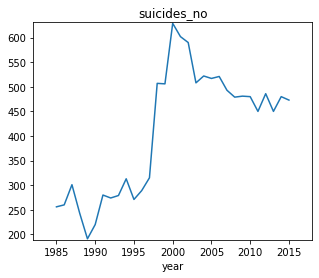

Men range 15-24 year Costa Rica 's suicides_no


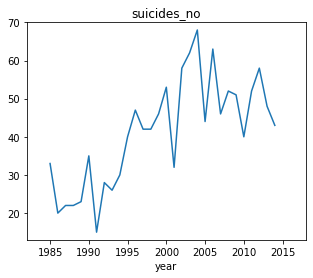

Men range 15-24 year Ecuador 's suicides_no


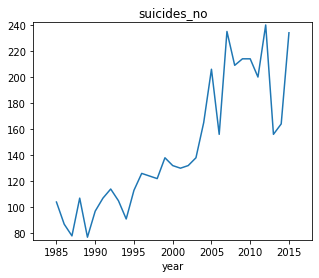

Men range 15-24 year France 's suicides_no


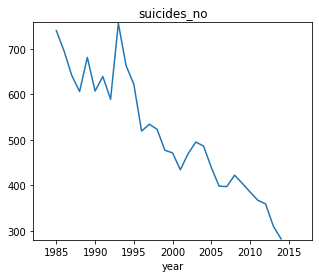

Men range 15-24 year Greece 's suicides_no


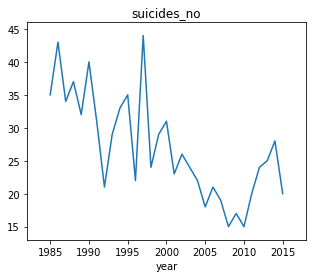

Men range 15-24 year Grenada 's suicides_no


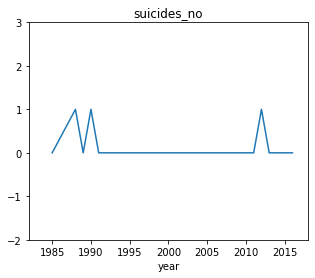

Men range 15-24 year Iceland 's suicides_no


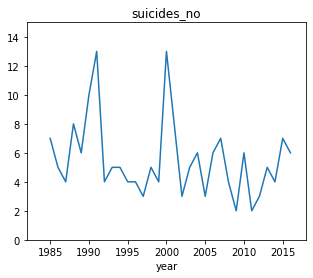

Men range 15-24 year Ireland 's suicides_no


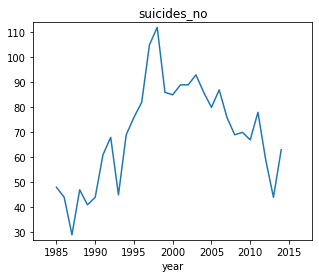

Men range 15-24 year Israel 's suicides_no


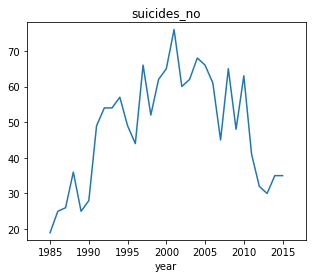

Men range 15-24 year Italy 's suicides_no


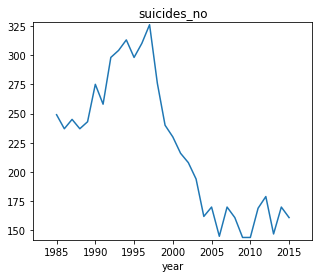

Men range 15-24 year Japan 's suicides_no


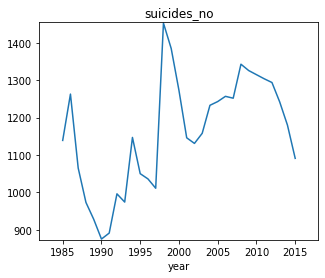

Men range 15-24 year Kuwait 's suicides_no


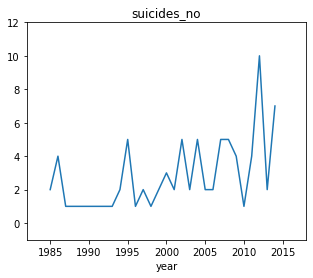

Men range 15-24 year Luxembourg 's suicides_no


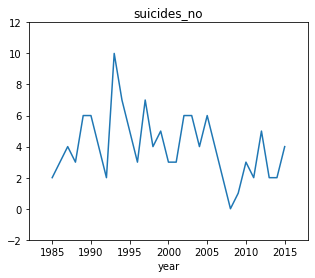

Men range 15-24 year Malta 's suicides_no


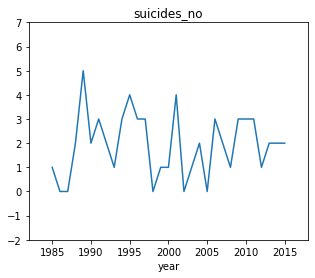

Men range 15-24 year Mauritius 's suicides_no


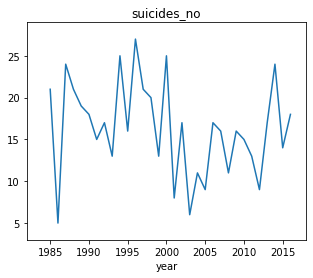

Men range 15-24 year Mexico 's suicides_no


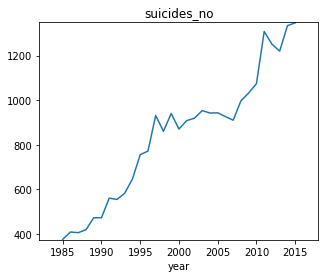

Men range 15-24 year Netherlands 's suicides_no


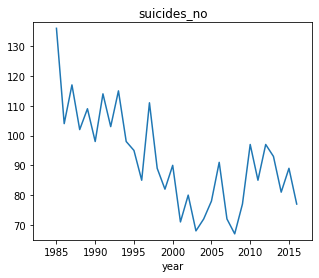

Men range 15-24 year New Zealand 's suicides_no


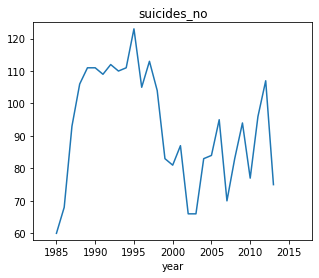

Men range 15-24 year Panama 's suicides_no


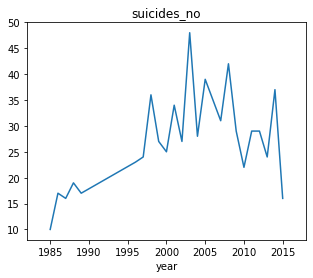

Men range 15-24 year Paraguay 's suicides_no


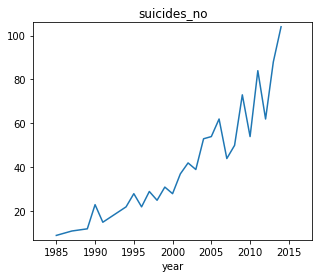

Men range 15-24 year Portugal 's suicides_no


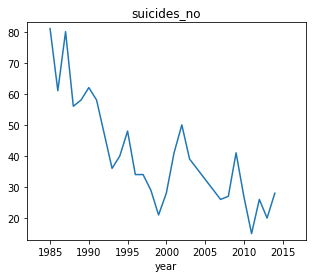

Men range 15-24 year Puerto Rico 's suicides_no


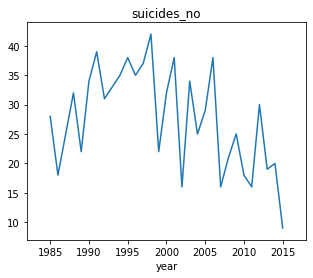

Men range 15-24 year Republic of Korea 's suicides_no


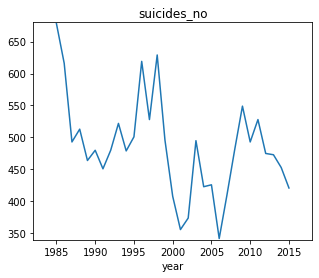

Men range 15-24 year Saint Vincent and Grenadines 's suicides_no


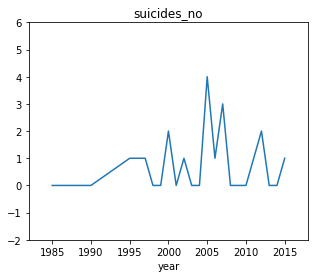

Men range 15-24 year Singapore 's suicides_no


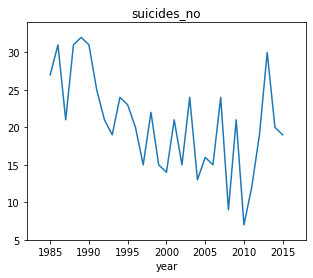

Men range 15-24 year Spain 's suicides_no


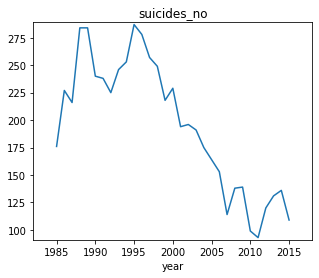

Men range 15-24 year Suriname 's suicides_no


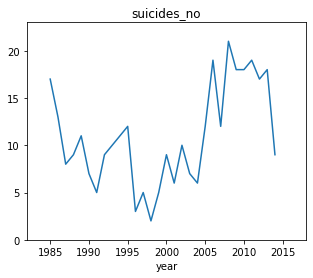

Men range 15-24 year Thailand 's suicides_no


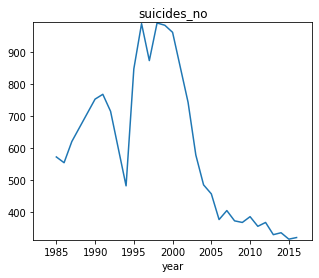

Men range 15-24 year Trinidad and Tobago 's suicides_no


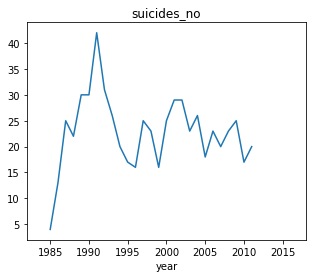

Men range 15-24 year United Kingdom 's suicides_no


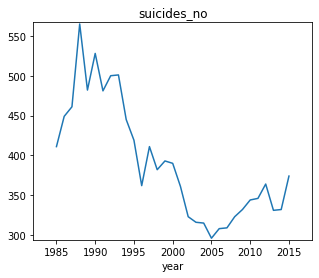

Men range 15-24 year United States 's suicides_no


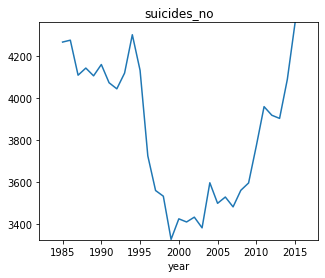

Men range 15-24 year Uruguay 's suicides_no


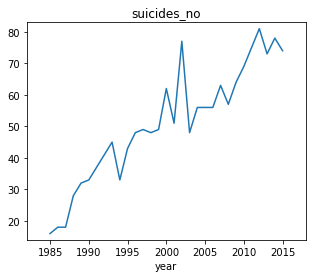

Men range 15-24 year Belize 's suicides_no


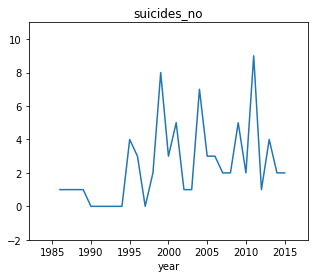

Men range 15-24 year Guatemala 's suicides_no


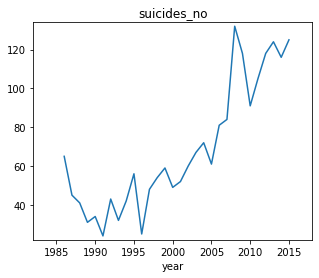

Men range 15-24 year Norway 's suicides_no


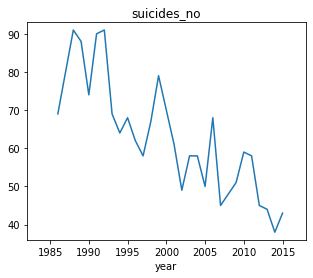

Men range 15-24 year Saint Lucia 's suicides_no


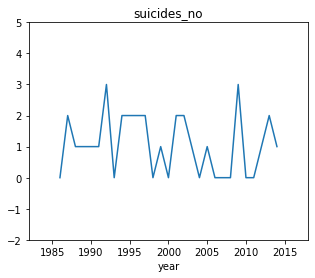

Men range 15-24 year Finland 's suicides_no


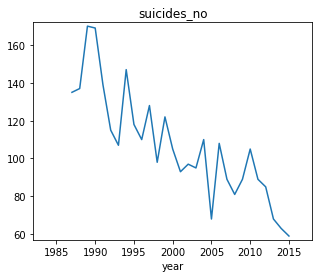

Men range 15-24 year Sweden 's suicides_no


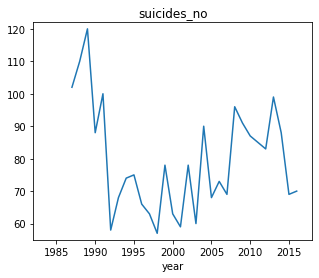

Men range 15-24 year Guyana 's suicides_no


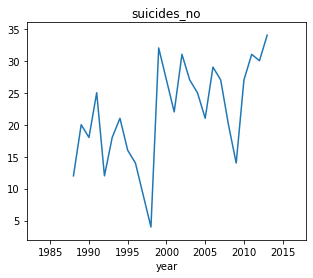

Men range 15-24 year Ukraine 's suicides_no


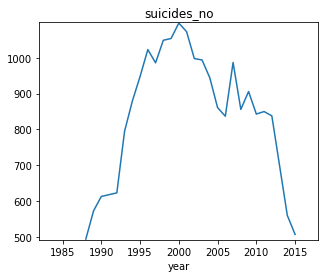

Men range 15-24 year Romania 's suicides_no


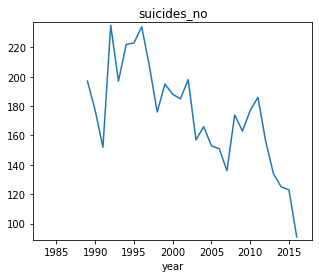

Men range 15-24 year Russian Federation 's suicides_no


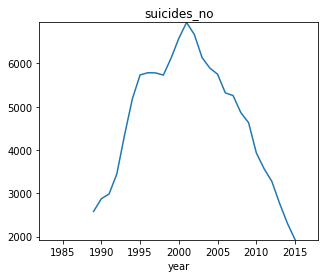

Men range 15-24 year Armenia 's suicides_no


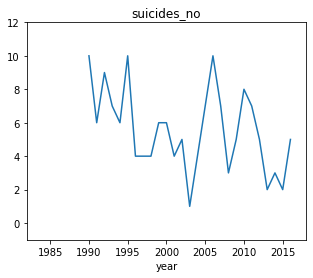

Men range 15-24 year Czech Republic 's suicides_no


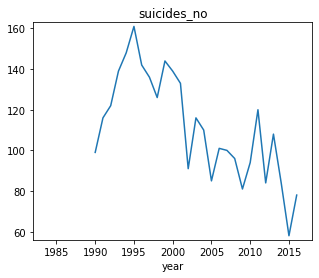

Men range 15-24 year Germany 's suicides_no


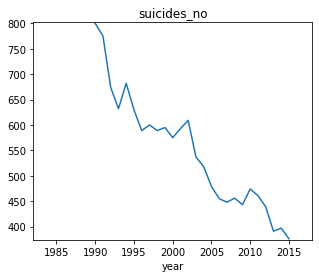

Men range 15-24 year Kazakhstan 's suicides_no


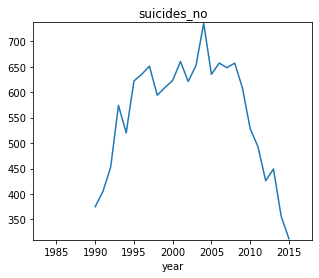

Men range 15-24 year Kyrgyzstan 's suicides_no


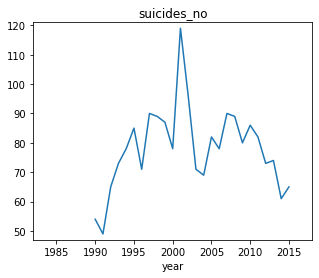

Men range 15-24 year Hungary 's suicides_no


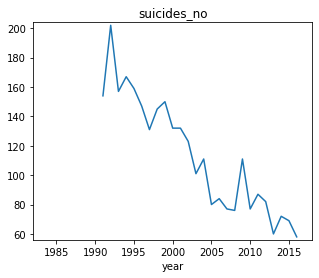

In [ ]:
# For male
for s in country:
    for t in targets:
      print("Men range 15-24 year", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = male_df[male_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(male_df[male_df["country"] == s][t].min()-2,male_df[male_df["country"] == s][t].max()+2)
      plt.show()

Women  Argentina 's suicides_no


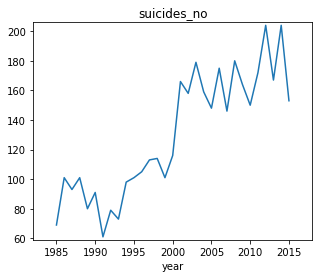

Women  Australia 's suicides_no


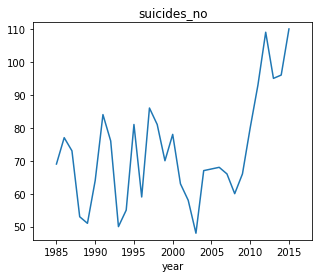

Women  Austria 's suicides_no


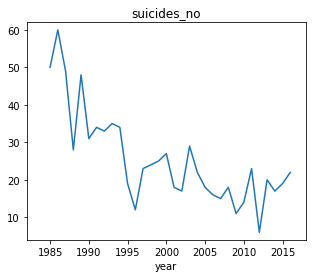

Women  Barbados 's suicides_no


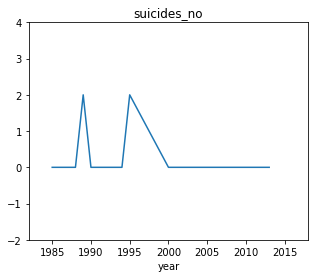

Women  Belgium 's suicides_no


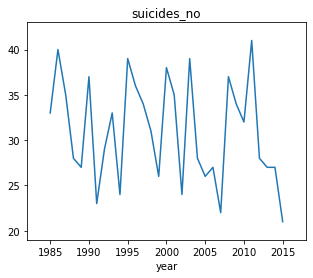

Women  Brazil 's suicides_no


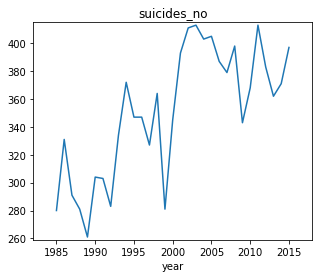

Women  Bulgaria 's suicides_no


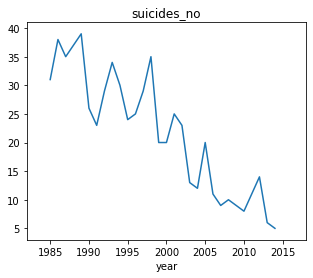

Women  Canada 's suicides_no


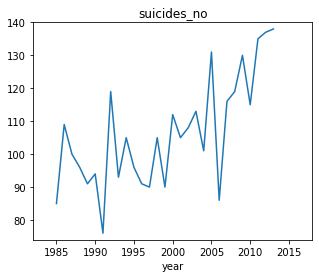

Women  Chile 's suicides_no


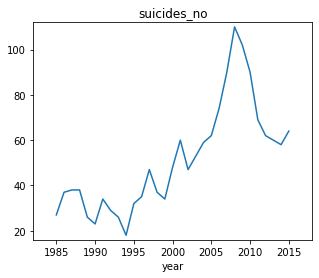

Women  Colombia 's suicides_no


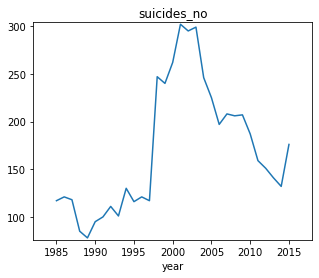

Women  Costa Rica 's suicides_no


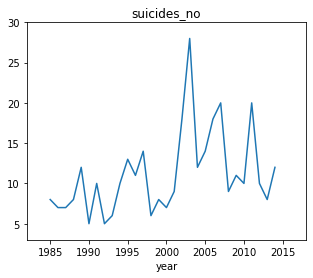

Women  Ecuador 's suicides_no


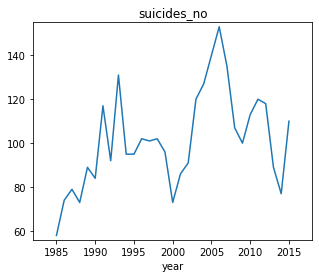

Women  France 's suicides_no


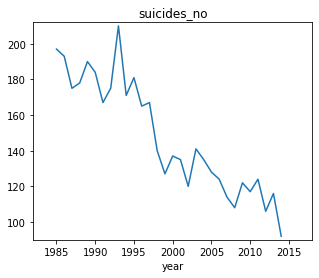

Women  Greece 's suicides_no


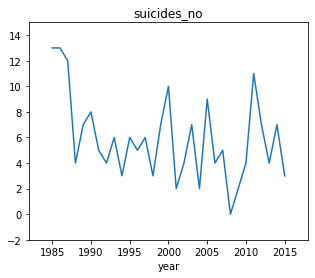

Women  Grenada 's suicides_no


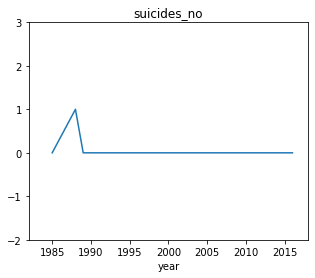

Women  Iceland 's suicides_no


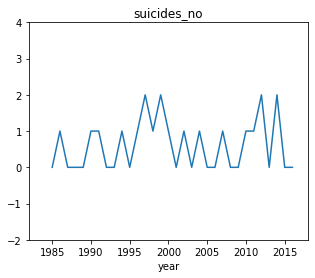

Women  Ireland 's suicides_no


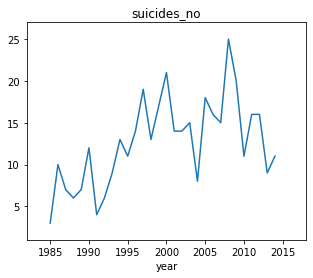

Women  Israel 's suicides_no


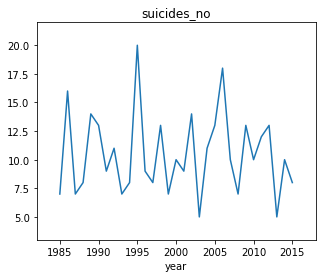

Women  Italy 's suicides_no


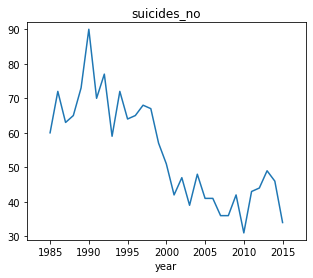

Women  Japan 's suicides_no


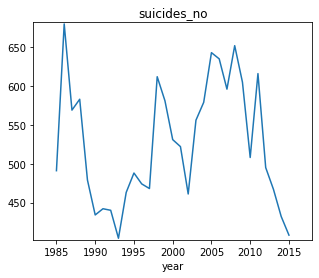

Women  Kuwait 's suicides_no


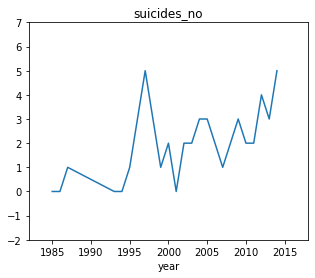

Women  Luxembourg 's suicides_no


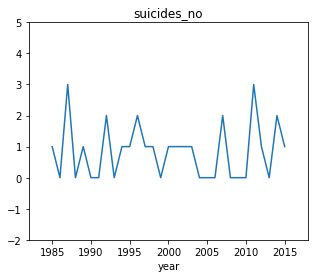

Women  Malta 's suicides_no


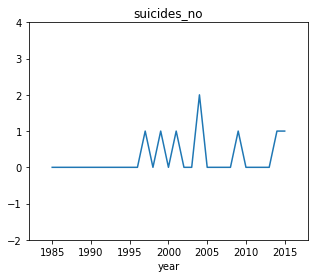

Women  Mauritius 's suicides_no


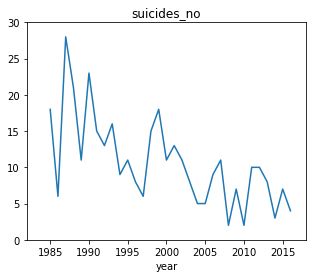

Women  Mexico 's suicides_no


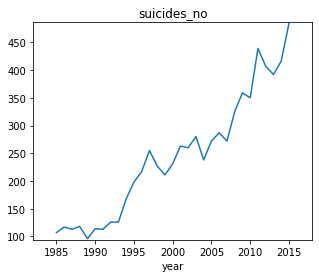

Women  Netherlands 's suicides_no


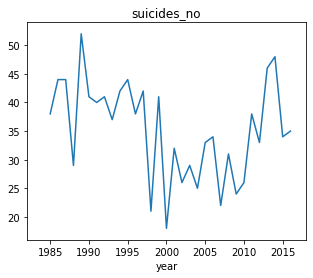

Women  New Zealand 's suicides_no


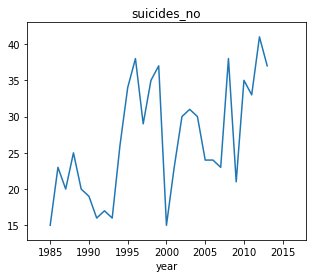

Women  Panama 's suicides_no


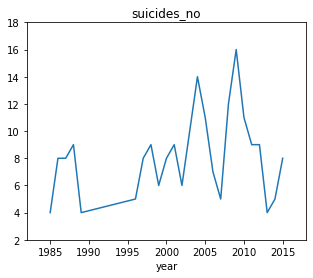

Women  Paraguay 's suicides_no


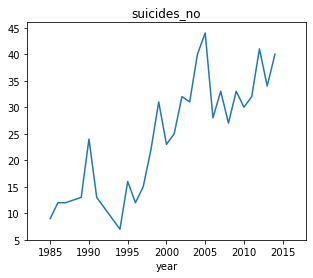

Women  Portugal 's suicides_no


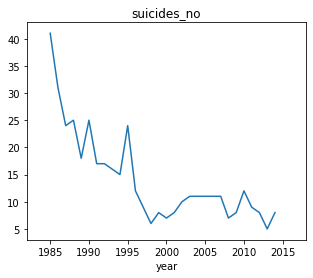

Women  Puerto Rico 's suicides_no


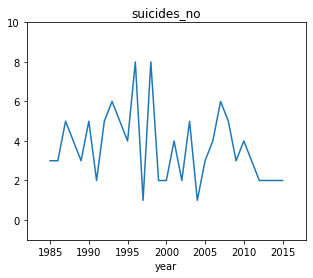

Women  Republic of Korea 's suicides_no


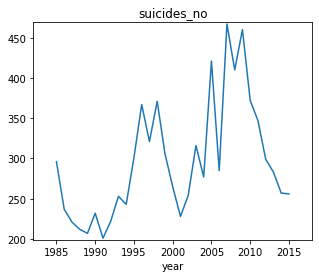

Women  Saint Vincent and Grenadines 's suicides_no


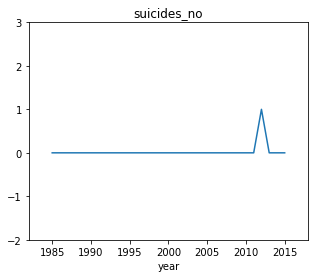

Women  Singapore 's suicides_no


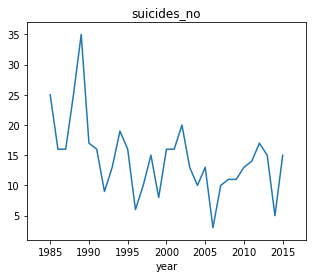

Women  Spain 's suicides_no


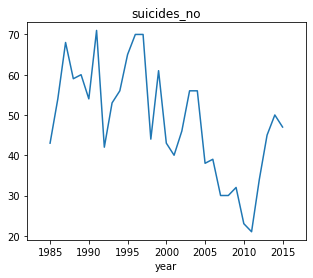

Women  Suriname 's suicides_no


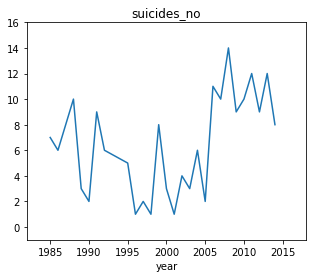

Women  Thailand 's suicides_no


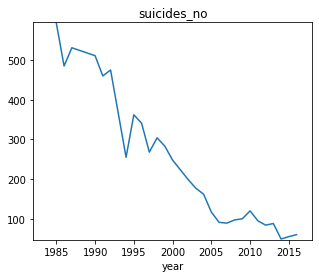

Women  Trinidad and Tobago 's suicides_no


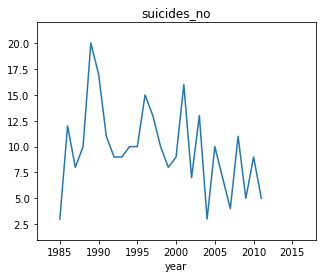

Women  United Kingdom 's suicides_no


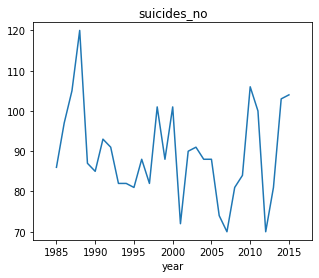

Women  United States 's suicides_no


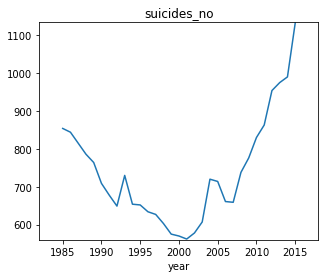

Women  Uruguay 's suicides_no


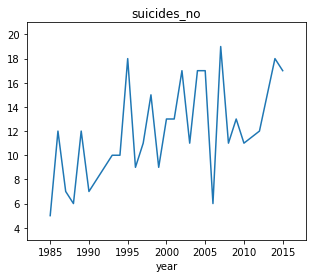

Women  Belize 's suicides_no


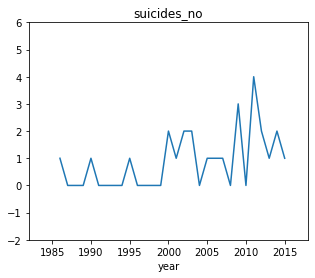

Women  Guatemala 's suicides_no


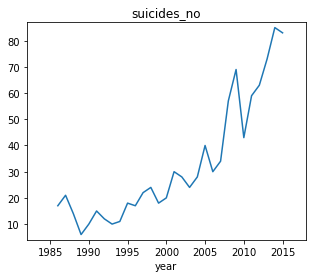

Women  Norway 's suicides_no


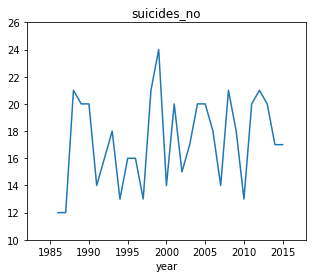

Women  Saint Lucia 's suicides_no


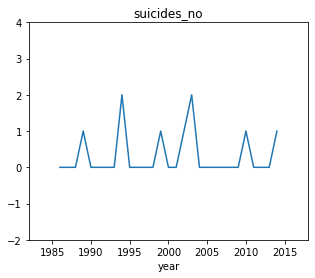

Women  Finland 's suicides_no


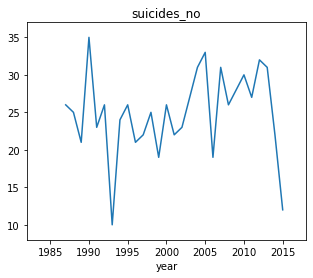

Women  Sweden 's suicides_no


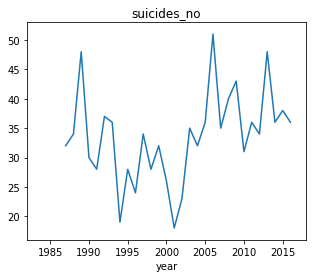

Women  Guyana 's suicides_no


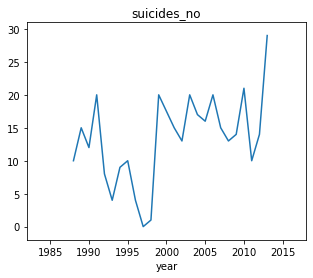

Women  Ukraine 's suicides_no


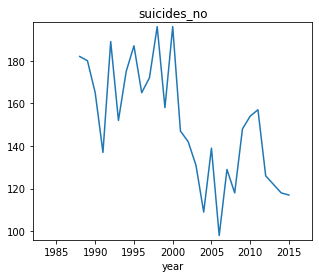

Women  Romania 's suicides_no


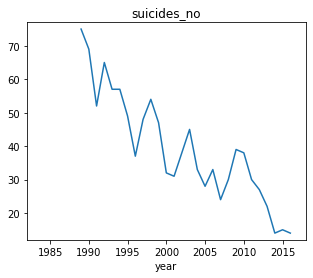

Women  Russian Federation 's suicides_no


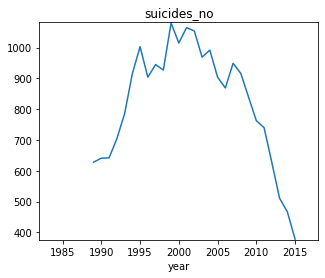

Women  Armenia 's suicides_no


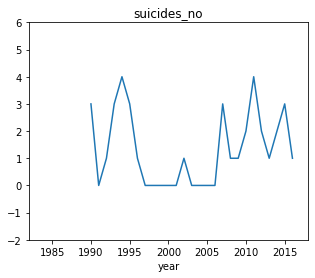

Women  Czech Republic 's suicides_no


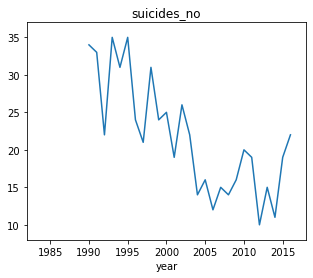

Women  Germany 's suicides_no


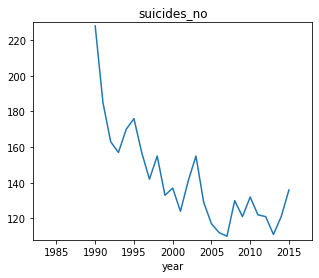

Women  Kazakhstan 's suicides_no


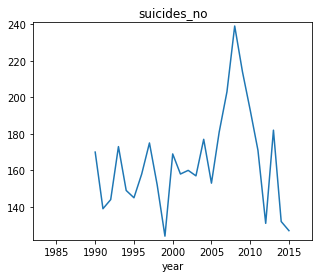

Women  Kyrgyzstan 's suicides_no


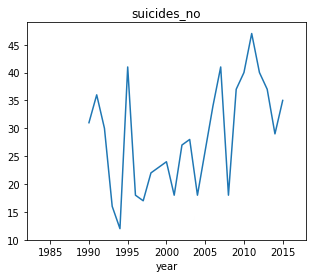

Women  Hungary 's suicides_no


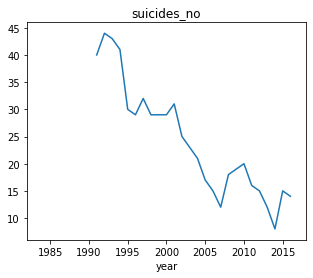

In [ ]:
# For female
for s in fecountry:
    for t in fetargets:
      print("Women ", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = female_df[female_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(female_df[female_df["country"] == s][t].min()-2,female_df[female_df["country"] == s][t].max()+2)
      plt.show()

### 1 B. Plot the suicide time series for all countries.

In [ ]:
pivot_test = male_df.pivot_table(index = "year",columns="country", values=targets)
pivot_test_fem = female_df.pivot_table(index = "year", columns = "country", values = targets)
pivot_test_fem

suicides_no                    ...                                     
country   Argentina Armenia Australia  ... United Kingdom United States Uruguay
year                                   ...                                     
1985           69.0     NaN      69.0  ...           86.0         854.0     5.0
1986          101.0     NaN      77.0  ...           97.0         844.0    12.0
1987           93.0     NaN      73.0  ...          105.0         815.0     7.0
1988          101.0     NaN      53.0  ...          120.0         786.0     6.0
1989           80.0     NaN      51.0  ...           87.0         764.0    12.0
1990           91.0     3.0      64.0  ...           85.0         709.0     7.0
1991           61.0     0.0      84.0  ...           93.0         678.0     NaN
1992           79.0     1.0      76.0  ...           91.0         649.0     NaN
1993           73.0     3.0      50.0  ...           82.0         730.0    10.0
1994           98.0     4.0      55.0  ...           82.0         654.0    10.0
1995          101.0     3.0      81.0  ...           81.0         652.0    18.0
1996          105.0     1.0      59.0  ...           88.0         634.0     9.0
1997          113.0     0.0      86.0  ...           82.0         627.0    11.0
1998          114.0     0.0      81.0  ...          101.0         603.0    15.0
1999          101.0     0.0      70.0  ...           88.0         575.0     9.0
2000          116.0     0.0      78.0  ...          101.0         570.0    13.0
2001          166.0     0.0      63.0  ...           72.0         562.0    13.0
2002          158.0     1.0      58.0  ...           90.0         578.0    17.0
2003          179.0     0.0      48.0  ...           91.0         607.0    11.0
2004          159.0     NaN      67.0  ...           88.0         720.0    17.0
2005          148.0     NaN       NaN  ...           88.0         714.0    17.0
2006          175.0     0.0      68.0  ...           74.0         661.0     6.0
2007          146.0     3.0      66.0  ...           70.0         659.0    19.0
2008          180.0     1.0      60.0  ...           81.0         738.0    11.0
2009          164.0     1.0      66.0  ...           84.0         776.0    13.0
2010          150.0     2.0      80.0  ...          106.0         830.0    11.0
2011          172.0     4.0      93.0  ...          100.0         863.0     NaN
2012          204.0     2.0     109.0  ...           70.0         954.0    12.0
2013          167.0     1.0      95.0  ...           81.0         975.0    15.0
2014          204.0     2.0      96.0  ...          103.0         990.0    18.0
2015          153.0     3.0     110.0  ...          104.0        1132.0    17.0
2016            NaN     1.0       NaN  ...            NaN           NaN     NaN

[32 rows x 57 columns]

In [ ]:
## This is for data interpolation
timeSeriesRes = pivot_test["suicides_no"]

inter_ts = timeSeriesRes.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts = inter_ts.interpolate(method = 'pad',axis =0)
#female
timeSeriesRes_fem = pivot_test_fem["suicides_no"]

inter_ts_fem = timeSeriesRes_fem.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts_fem = inter_ts_fem.interpolate(method = 'pad',axis =0)

In [ ]:
inter_ts

country  Argentina  Armenia  Australia  ...  United Kingdom  United States  Uruguay
year                                    ...                                        
1985         156.0     10.0      315.0  ...           411.0         4267.0     16.0
1986         186.0     10.0      296.0  ...           449.0         4276.0     18.0
1987         179.0     10.0      354.0  ...           461.0         4109.0     18.0
1988         211.0     10.0      366.0  ...           565.0         4143.0     28.0
1989         186.0     10.0      353.0  ...           482.0         4106.0     32.0
1990         174.0     10.0      374.0  ...           528.0         4160.0     33.0
1991         179.0      6.0      354.0  ...           481.0         4073.0     37.0
1992         249.0      9.0      384.0  ...           500.0         4044.0     41.0
1993         235.0      7.0      332.0  ...           501.0         4119.0     45.0
1994         250.0      6.0      377.0  ...           445.0         4302.0     33.0
1995         277.0     10.0      318.0  ...           419.0         4132.0     43.0
1996         280.0      4.0      366.0  ...           362.0         3724.0     48.0
1997         260.0      4.0      408.0  ...           411.0         3559.0     49.0
1998         327.0      4.0      353.0  ...           382.0         3532.0     48.0
1999         355.0      6.0      303.0  ...           393.0         3326.0     49.0
2000         463.0      6.0      271.0  ...           390.0         3424.0     62.0
2001         518.0      4.0      280.0  ...           361.0         3409.0     51.0
2002         542.0      5.0      246.0  ...           323.0         3432.0     77.0
2003         638.0      1.0      243.0  ...           316.0         3381.0     48.0
2004         653.0      4.0      205.0  ...           315.0         3596.0     56.0
2005         638.0      7.0      217.5  ...           296.0         3498.0     56.0
2006         656.0     10.0      230.0  ...           308.0         3528.0     56.0
2007         577.0      7.0      234.0  ...           309.0         3481.0     63.0
2008         625.0      3.0      228.0  ...           323.0         3560.0     57.0
2009         609.0      5.0      210.0  ...           332.0         3595.0     64.0
2010         683.0      8.0      222.0  ...           344.0         3772.0     69.0
2011         693.0      7.0      242.0  ...           346.0         3959.0     75.0
2012         745.0      5.0      217.0  ...           364.0         3918.0     81.0
2013         696.0      2.0      267.0  ...           331.0         3903.0     73.0
2014         738.0      3.0      271.0  ...           332.0         4089.0     78.0
2015         656.0      2.0      281.0  ...           374.0         4359.0     74.0
2016         656.0      5.0      281.0  ...           374.0         4359.0     74.0

[32 rows x 57 columns]

In [ ]:
inter_ts_fem

country  Argentina  Armenia  Australia  ...  United Kingdom  United States  Uruguay
year                                    ...                                        
1985          69.0      3.0       69.0  ...            86.0          854.0      5.0
1986         101.0      3.0       77.0  ...            97.0          844.0     12.0
1987          93.0      3.0       73.0  ...           105.0          815.0      7.0
1988         101.0      3.0       53.0  ...           120.0          786.0      6.0
1989          80.0      3.0       51.0  ...            87.0          764.0     12.0
1990          91.0      3.0       64.0  ...            85.0          709.0      7.0
1991          61.0      0.0       84.0  ...            93.0          678.0      8.0
1992          79.0      1.0       76.0  ...            91.0          649.0      9.0
1993          73.0      3.0       50.0  ...            82.0          730.0     10.0
1994          98.0      4.0       55.0  ...            82.0          654.0     10.0
1995         101.0      3.0       81.0  ...            81.0          652.0     18.0
1996         105.0      1.0       59.0  ...            88.0          634.0      9.0
1997         113.0      0.0       86.0  ...            82.0          627.0     11.0
1998         114.0      0.0       81.0  ...           101.0          603.0     15.0
1999         101.0      0.0       70.0  ...            88.0          575.0      9.0
2000         116.0      0.0       78.0  ...           101.0          570.0     13.0
2001         166.0      0.0       63.0  ...            72.0          562.0     13.0
2002         158.0      1.0       58.0  ...            90.0          578.0     17.0
2003         179.0      0.0       48.0  ...            91.0          607.0     11.0
2004         159.0      0.0       67.0  ...            88.0          720.0     17.0
2005         148.0      0.0       67.5  ...            88.0          714.0     17.0
2006         175.0      0.0       68.0  ...            74.0          661.0      6.0
2007         146.0      3.0       66.0  ...            70.0          659.0     19.0
2008         180.0      1.0       60.0  ...            81.0          738.0     11.0
2009         164.0      1.0       66.0  ...            84.0          776.0     13.0
2010         150.0      2.0       80.0  ...           106.0          830.0     11.0
2011         172.0      4.0       93.0  ...           100.0          863.0     11.5
2012         204.0      2.0      109.0  ...            70.0          954.0     12.0
2013         167.0      1.0       95.0  ...            81.0          975.0     15.0
2014         204.0      2.0       96.0  ...           103.0          990.0     18.0
2015         153.0      3.0      110.0  ...           104.0         1132.0     17.0
2016         153.0      1.0      110.0  ...           104.0         1132.0     17.0

[32 rows x 57 columns]

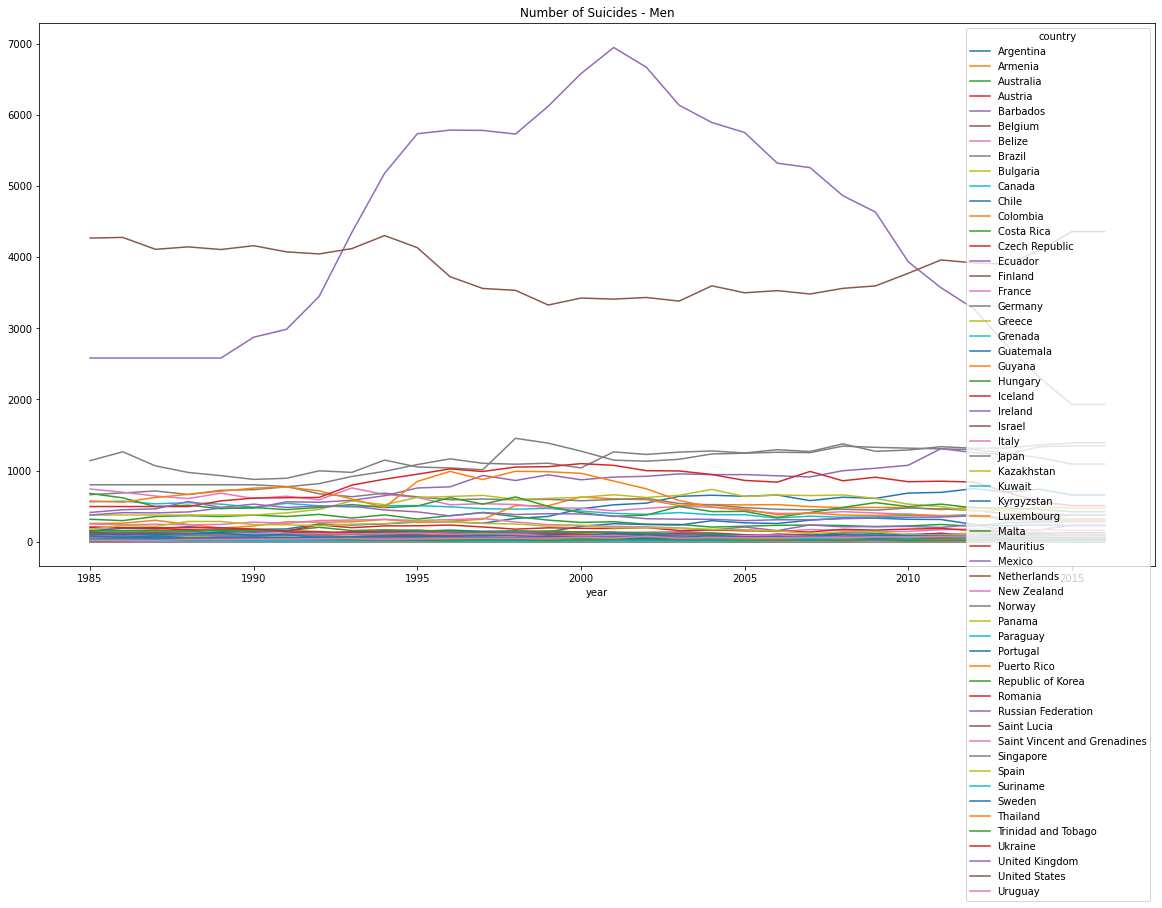

In [ ]:
inter_ts.plot(figsize = (20,10), title = "Number of Suicides - Men")

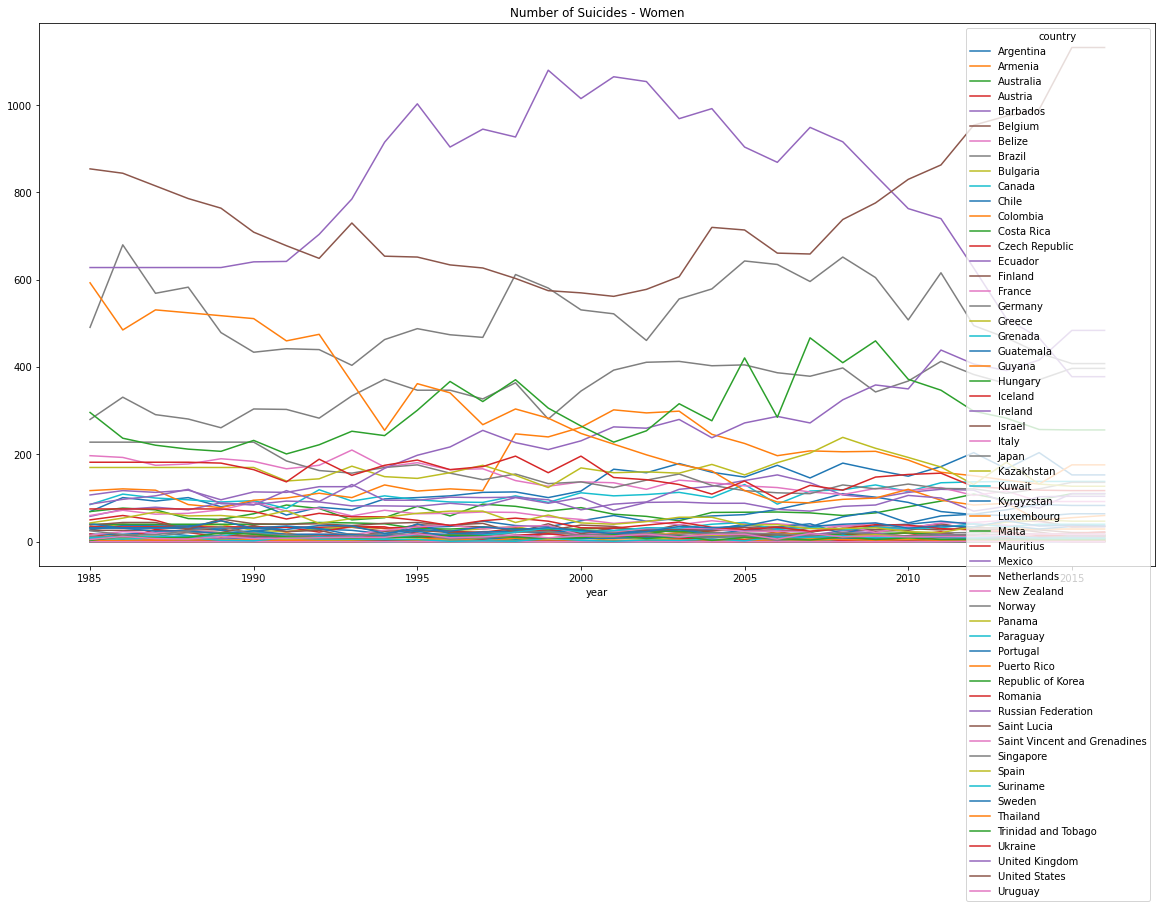

In [ ]:
inter_ts_fem.plot(figsize = (20,10), title = "Number of Suicides - Women")

## 2. Apply Hierarchical Clustering in order to identify those countries with similar behaviors in the time series.

### 2 A. method Ward with Euclidean distance



In [ ]:
Z = hac.linkage(inter_ts.T, method='ward', metric='euclidean')
Z_f = hac.linkage(inter_ts_fem.T, method='ward', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


[ 5  4  3  4  4  4  4  8  4  6  3  5  4  4  3  4  6  6  4  4  4  4  4  4
  4  4  3  8  5  4  4  4  4  4  9  4  4  4  4  4  4  4  6  3  1  4  4  4
  3  4  4  7  4 10  6  2  4]
Cluster 5 number of entries 3


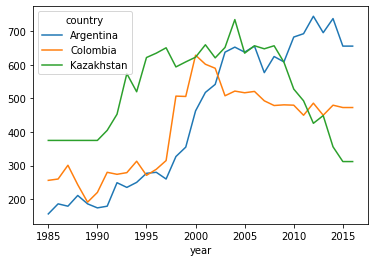

Cluster 4 number of entries 36


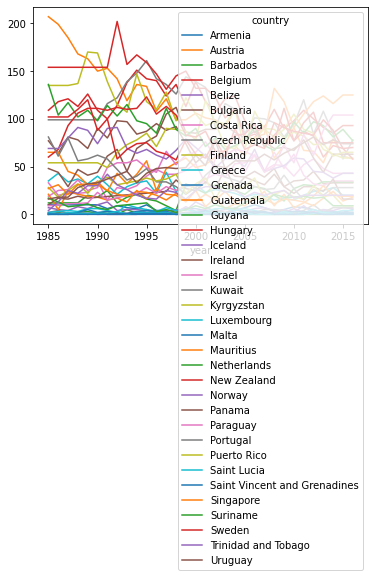

Cluster 3 number of entries 6


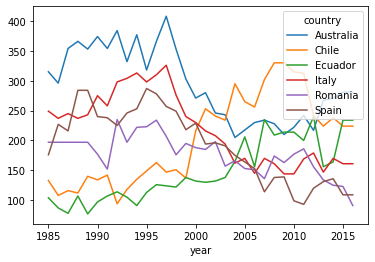

Cluster 8 number of entries 2


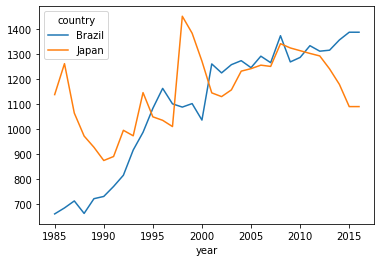

Cluster 6 number of entries 5


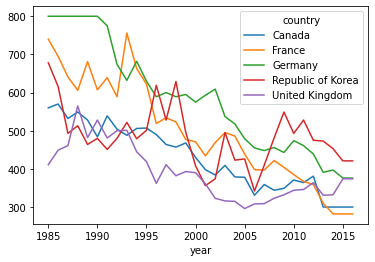

Cluster 9 number of entries 1


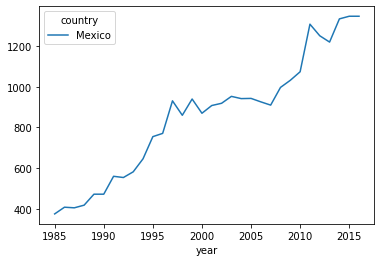

Cluster 1 number of entries 1


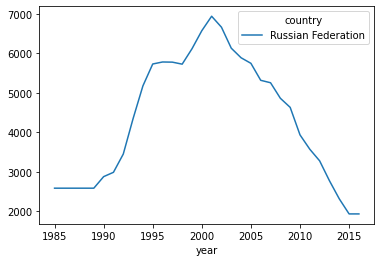

Cluster 7 number of entries 1


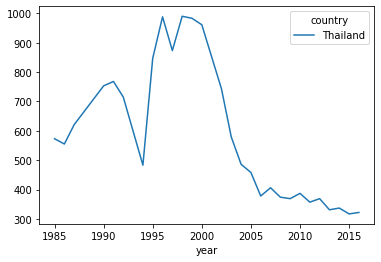

Cluster 10 number of entries 1


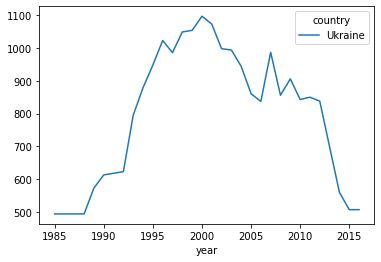

Cluster 2 number of entries 1


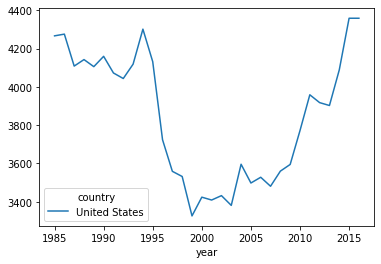

In [ ]:
print_clusters(inter_ts.T, Z, 10, True)

[ 6  4  6  5  4  5  4  8  5  6  5  7  4  5  6  5  7  7  4  4  5  4  5  4
  4  4  5  1  7  4  5  4  4  4  9  5  5  4  4  5  4  4  8  5  3  4  4  4
  5  4  5 10  4  7  6  2  4]
Cluster 6 number of entries 5


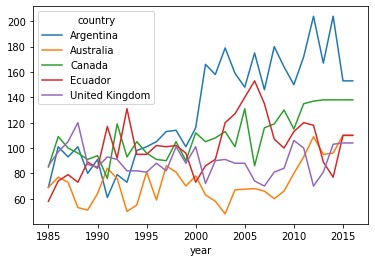

Cluster 4 number of entries 24


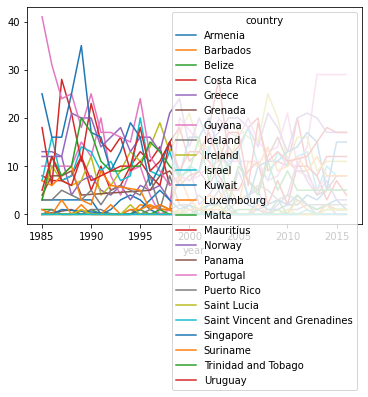

Cluster 5 number of entries 16


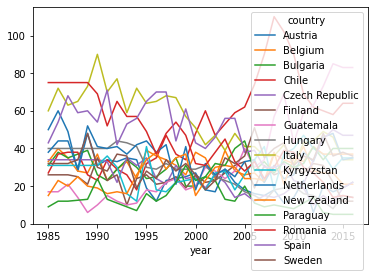

Cluster 8 number of entries 2


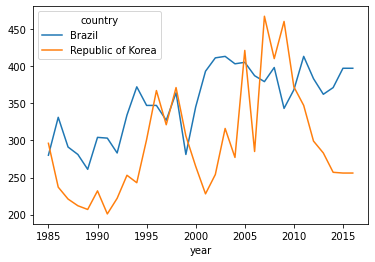

Cluster 7 number of entries 5


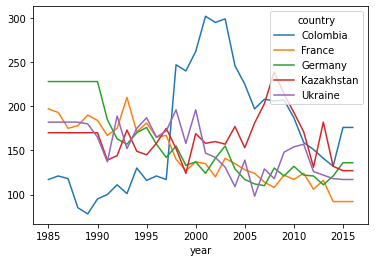

Cluster 1 number of entries 1


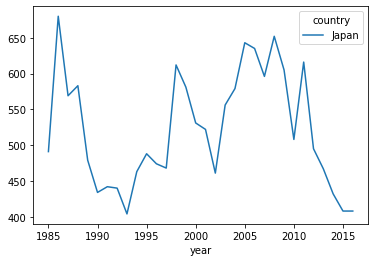

Cluster 9 number of entries 1


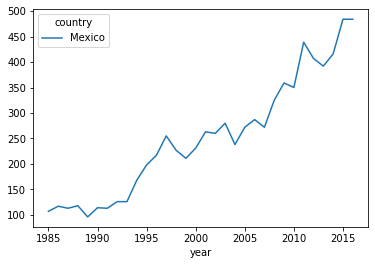

Cluster 3 number of entries 1


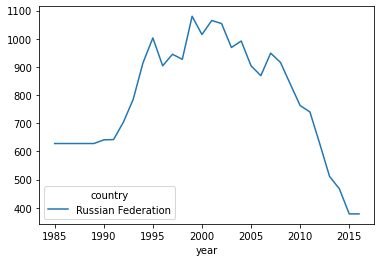

Cluster 10 number of entries 1


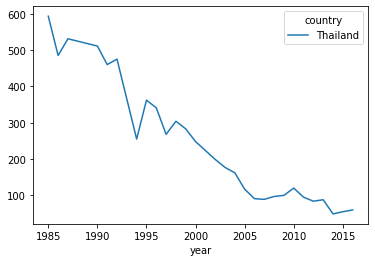

Cluster 2 number of entries 1


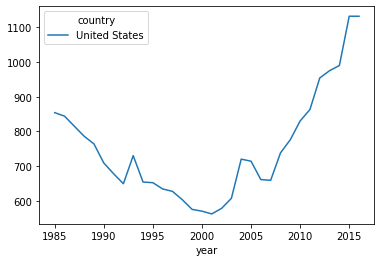

In [ ]:
print_clusters(inter_ts_fem.T, Z_f, 10, True)

### 2 B. Plot the dendrogram

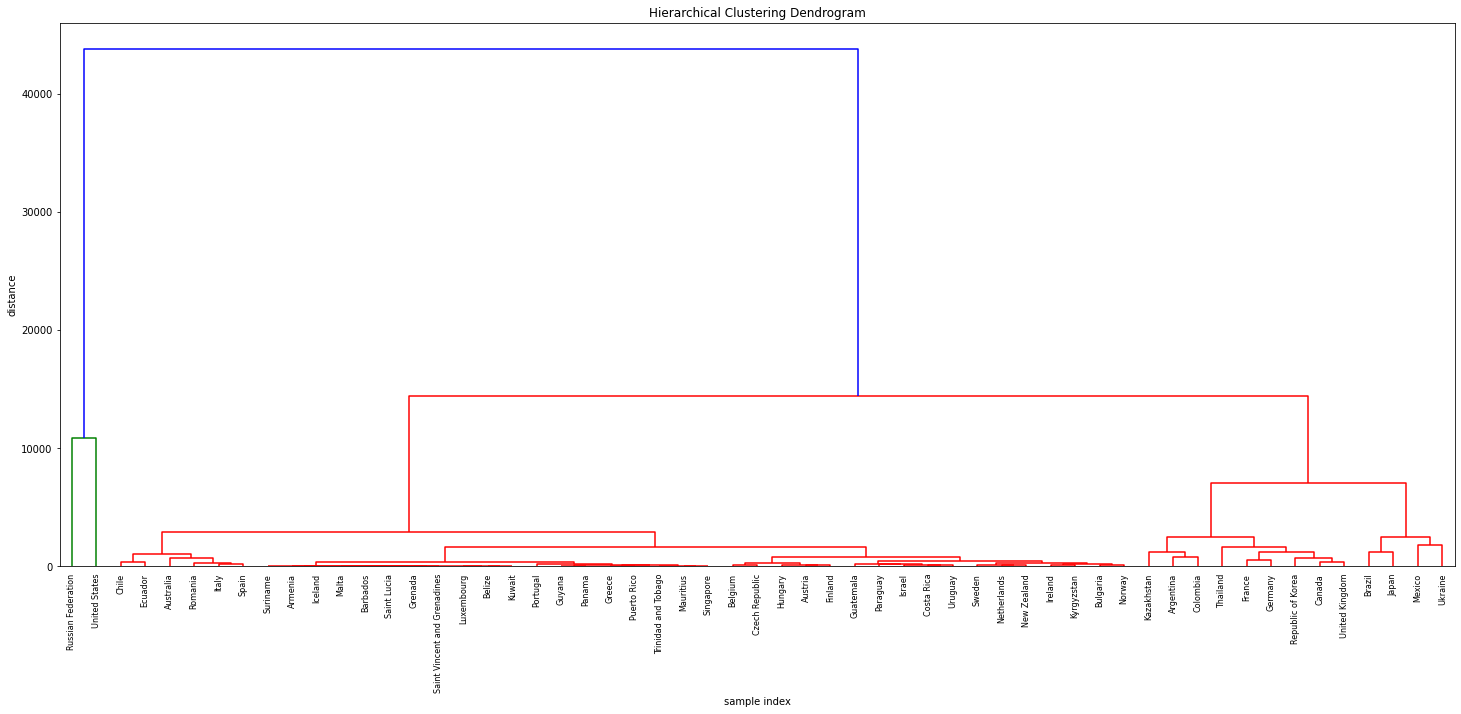

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

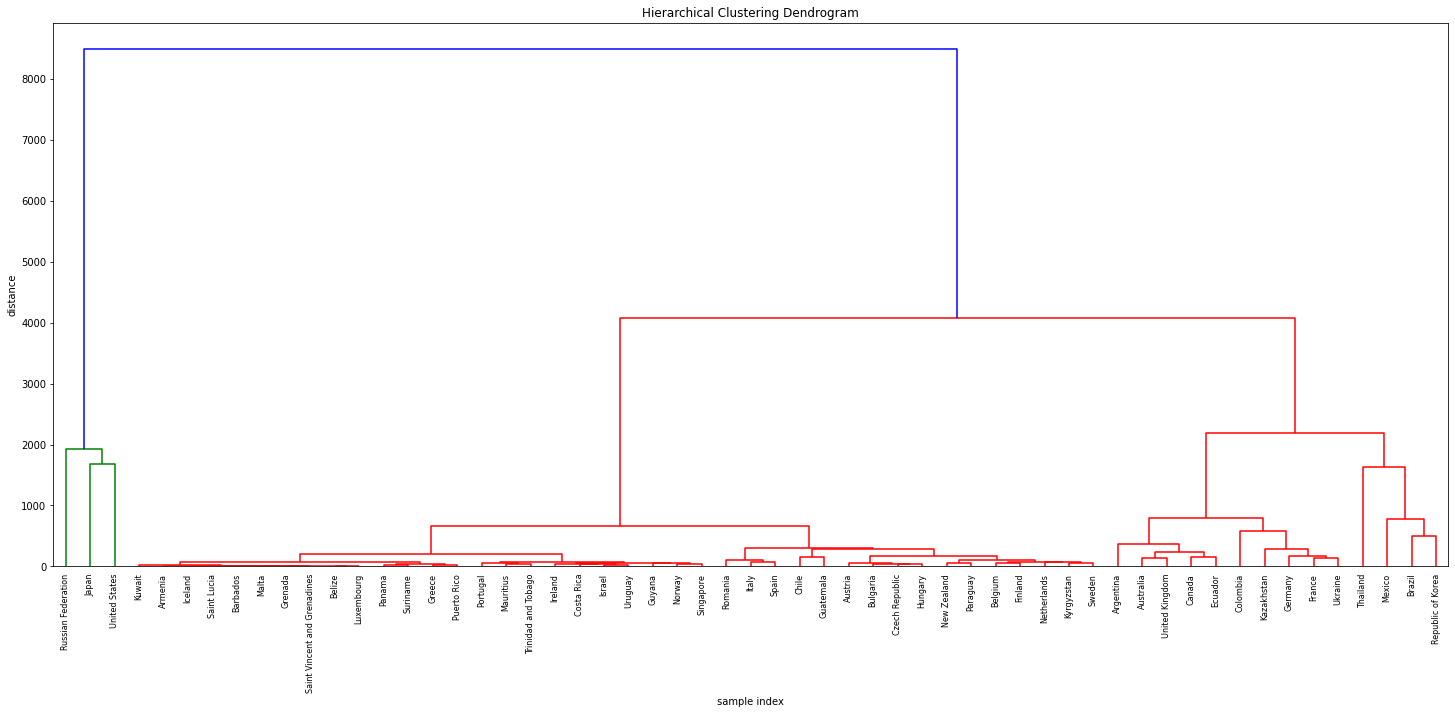

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### 2 D. Using the method Single with the metrics: Pearson Correlation, Spearman Correlation and Dynamic Time Warpping



In [ ]:
Z1 = hac.linkage(inter_ts.T, method='single', metric='correlation')
Z1_f = hac.linkage(inter_ts_fem.T, method='single', metric='correlation')


### 2 E. Plot the 3 dendrograms: single, correlation


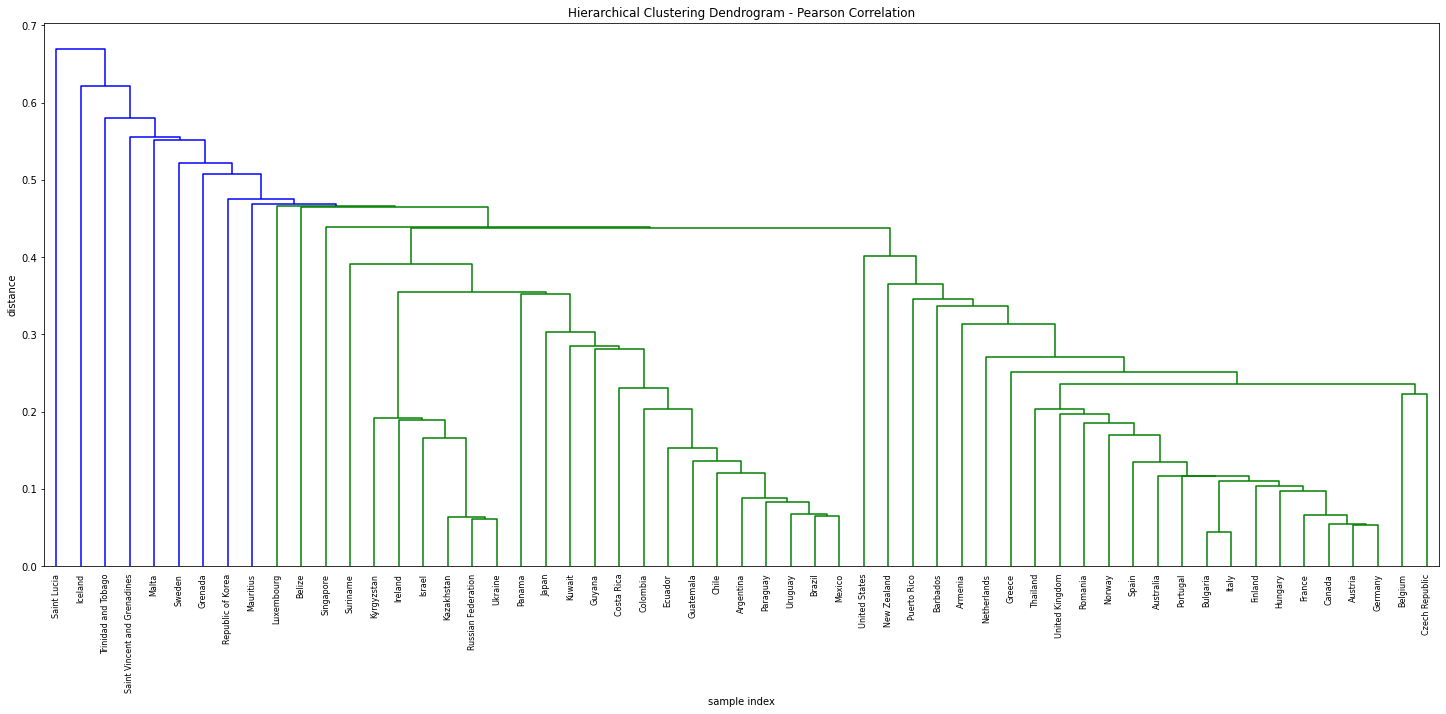

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Pearson Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z1,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

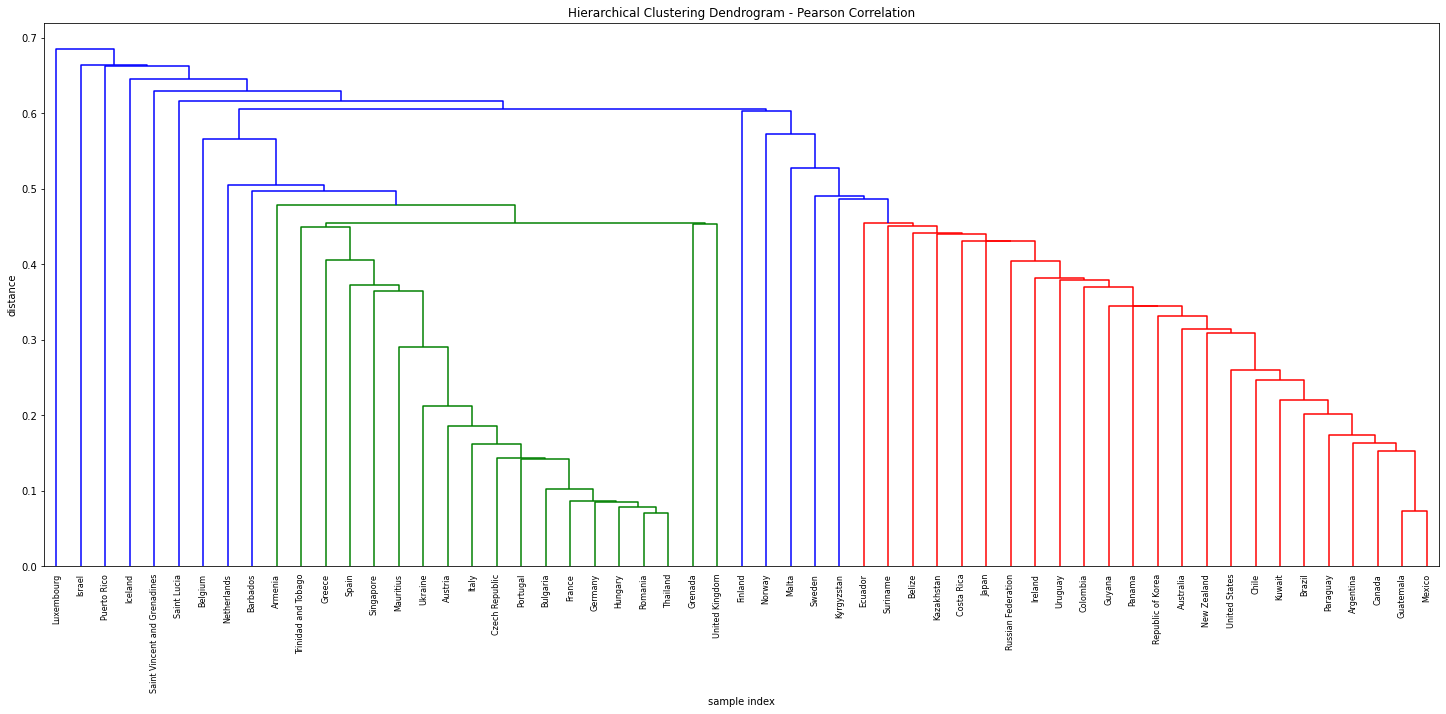

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Pearson Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z1_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# Here we use spearman correlation
def my_metric(x, y):
    r = stats.spearmanr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2
Z2 = hac.linkage(inter_ts.T, method='single', metric=my_metric)
Z2_f = hac.linkage(inter_ts_fem.T, method='single', metric=my_metric)

### 2 E. Plot the 3 dendrograms: single, Spearman


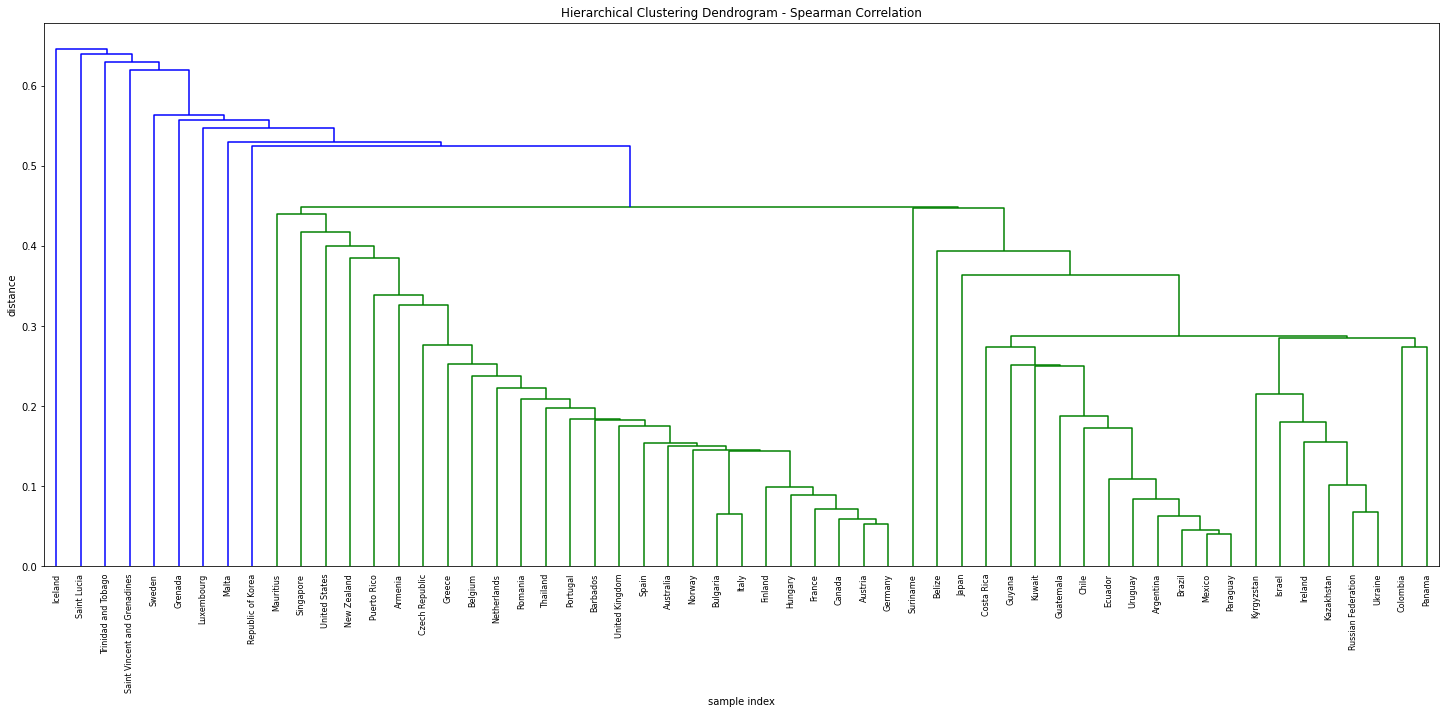

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Spearman Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z2,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

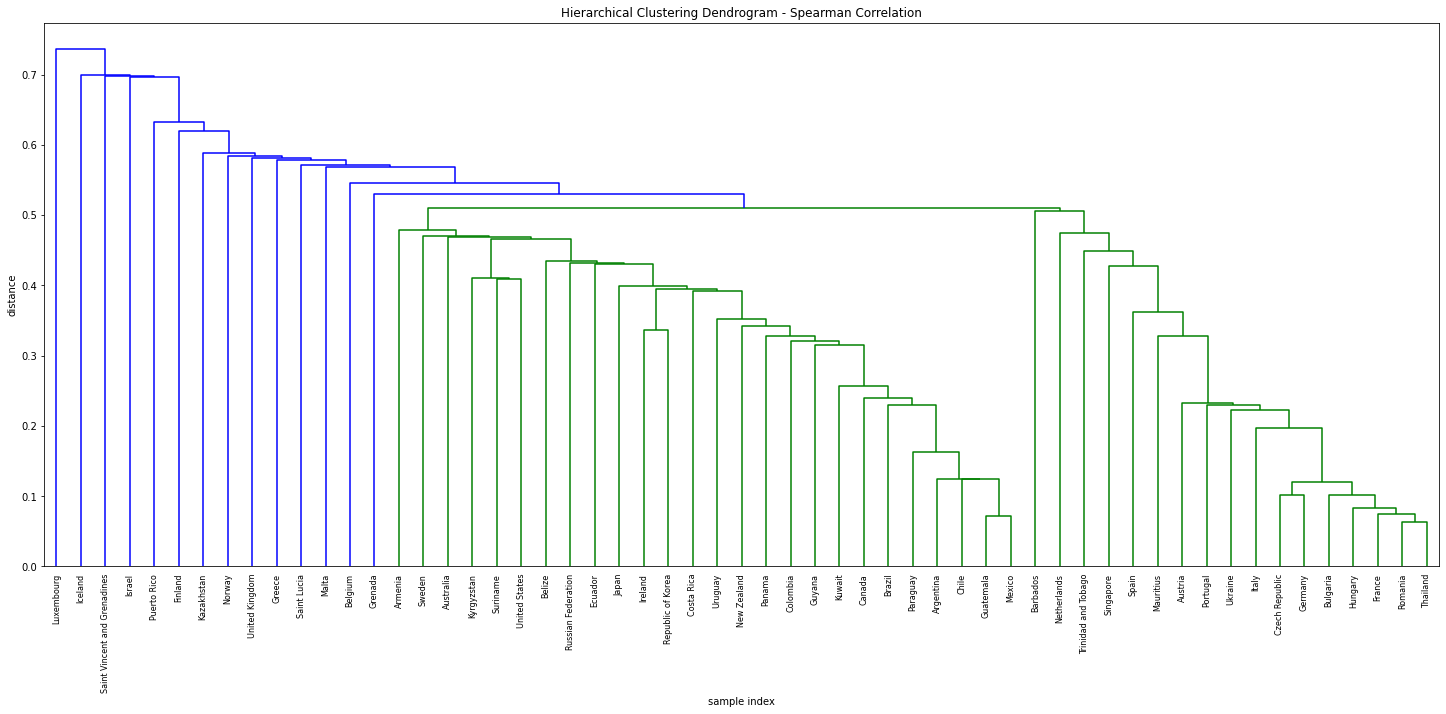

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Spearman Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z2_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance
Z3 = hac.linkage(inter_ts.T, method='single', metric=dtw)
Z3_f = hac.linkage(inter_ts_fem.T, method='single', metric=dtw)


### 2 E. Plot the 3 dendrograms: single, DTW


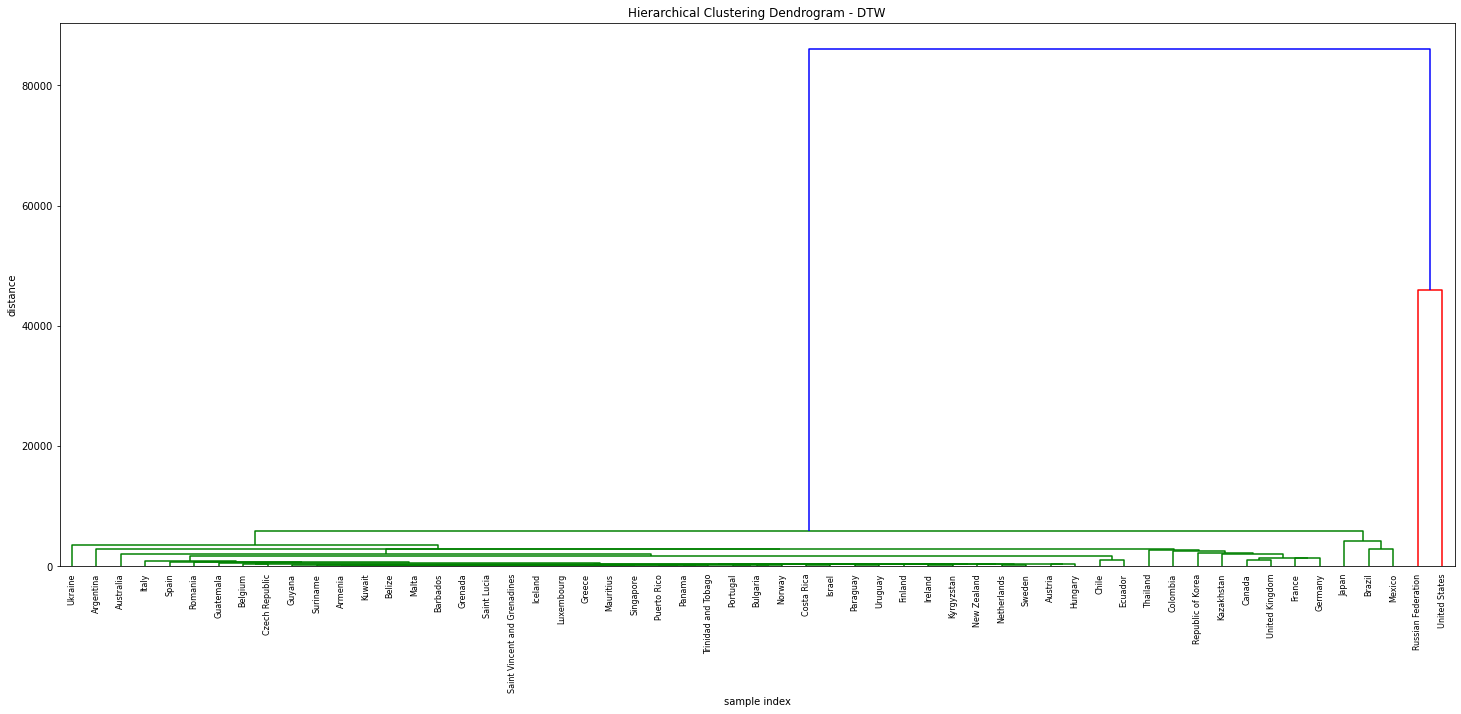

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

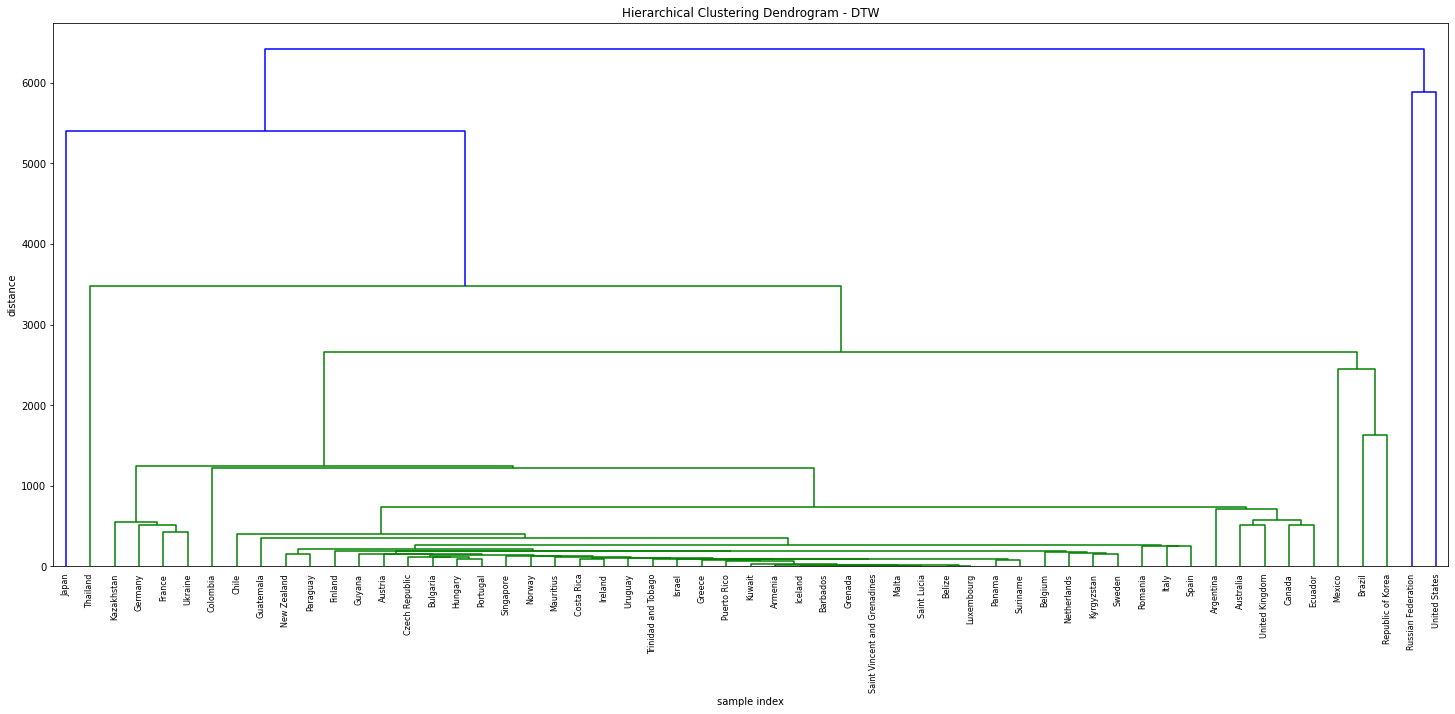

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### For the case of simple-Pearson Correlation:


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  9
  1  1  1  1  1  1  1  1  6  2  1  1  1  1  1  1  1  1  3  1  1 10  7  1
  1  1  5  1  8  1  1  1  1]
Cluster 1 number of entries 48


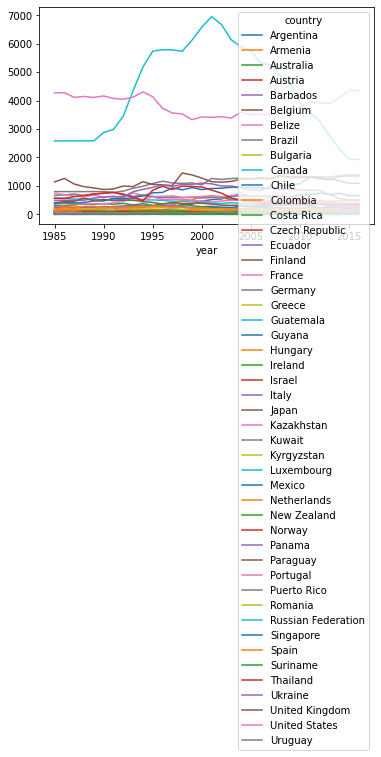

Cluster 4 number of entries 1


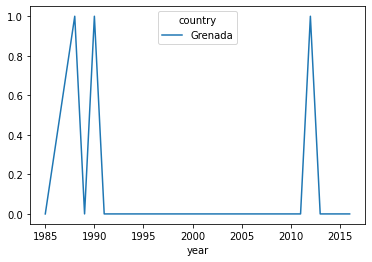

Cluster 9 number of entries 1


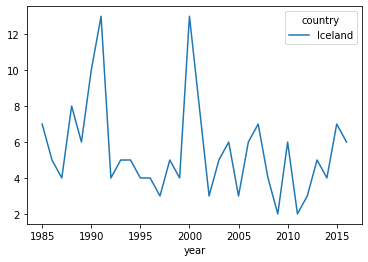

Cluster 6 number of entries 1


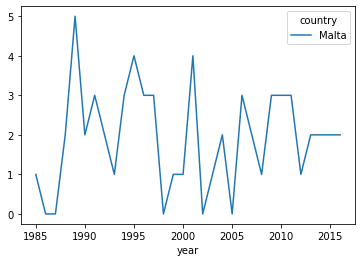

Cluster 2 number of entries 1


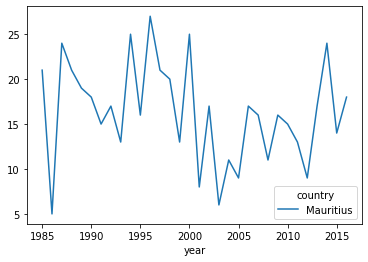

Cluster 3 number of entries 1


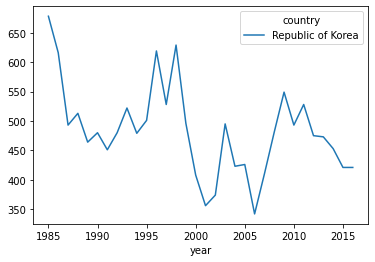

Cluster 10 number of entries 1


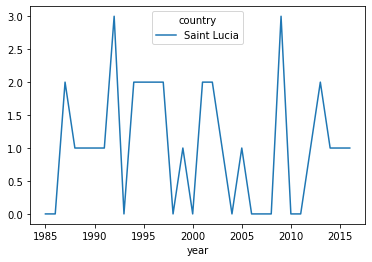

Cluster 7 number of entries 1


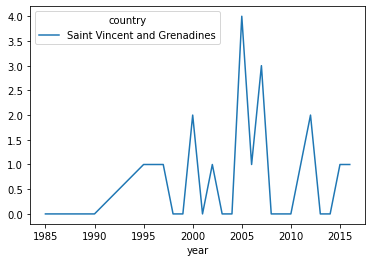

Cluster 5 number of entries 1


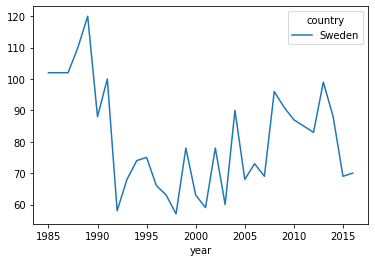

Cluster 8 number of entries 1


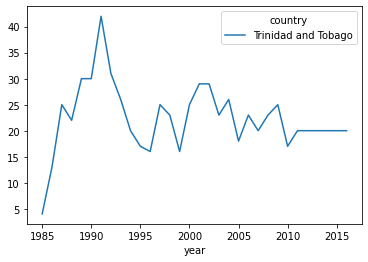

In [ ]:
print_clusters(inter_ts.T, Z1, 10, True)

[ 2  1  2  1  1  1  2  2  1  2  2  2  2  1  2  4  1  1  1  1  2  2  1  7
  2  9  1  2  2  2  2 10  2  1  2  1  2  3  2  2  1  8  2  1  2  5  6  1
  1  2  2  1  1  1  1  2  2]
Cluster 2 number of entries 27


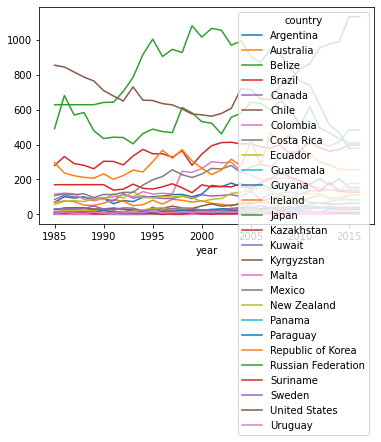

Cluster 1 number of entries 22


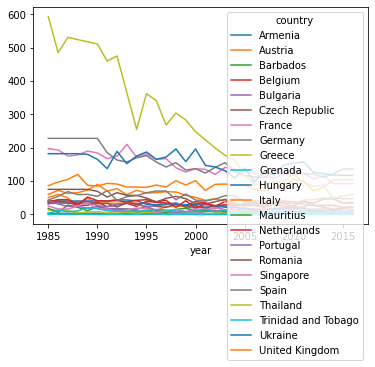

Cluster 4 number of entries 1


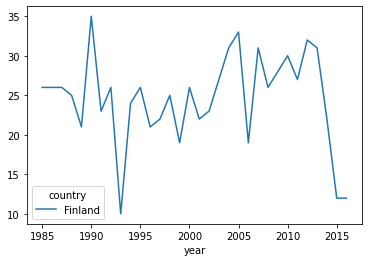

Cluster 7 number of entries 1


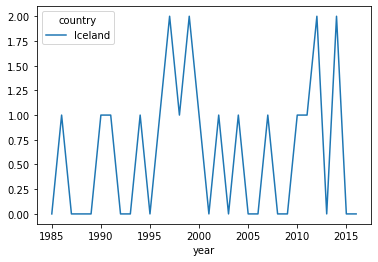

Cluster 9 number of entries 1


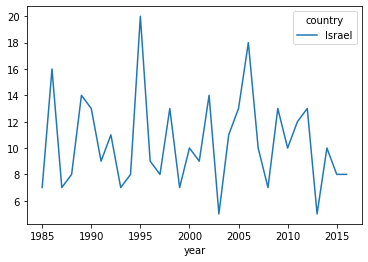

Cluster 10 number of entries 1


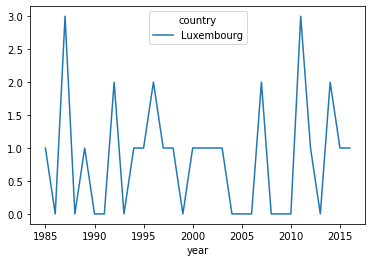

Cluster 3 number of entries 1


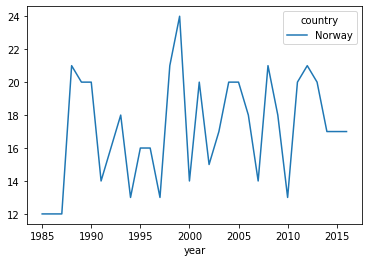

Cluster 8 number of entries 1


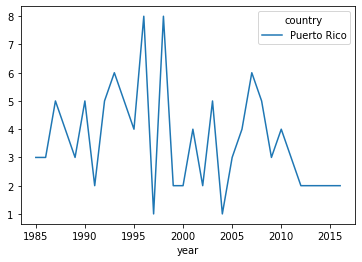

Cluster 5 number of entries 1


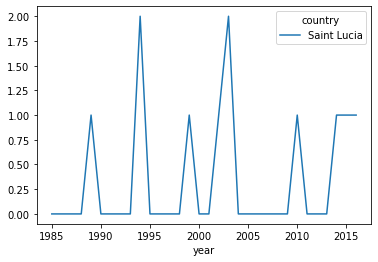

Cluster 6 number of entries 1


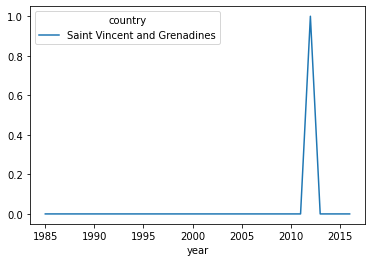

In [ ]:
print_clusters(inter_ts_fem.T, Z1_f, 10, True)

### For the case of simple-Spearman Correlation:


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  5  1  1  1 10
  1  1  1  1  1  1  1  4  3  1  1  1  1  1  1  1  1  1  2  1  1  9  7  1
  1  1  6  1  8  1  1  1  1]
Cluster 1 number of entries 48


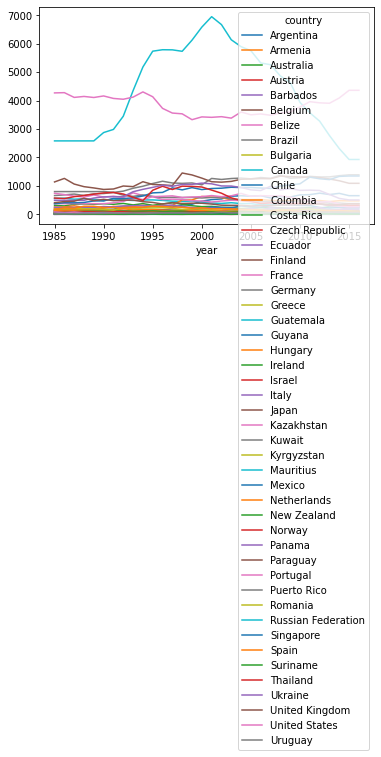

Cluster 5 number of entries 1


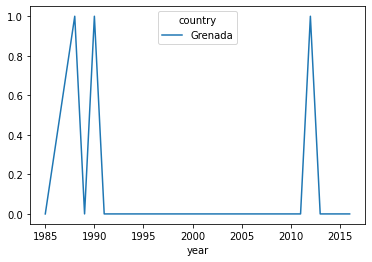

Cluster 10 number of entries 1


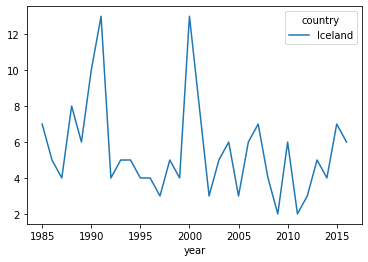

Cluster 4 number of entries 1


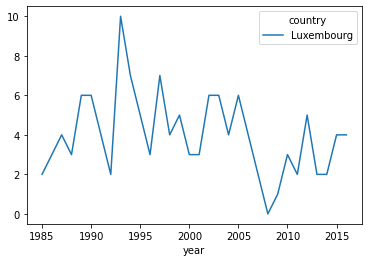

Cluster 3 number of entries 1


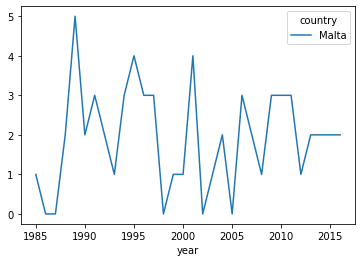

Cluster 2 number of entries 1


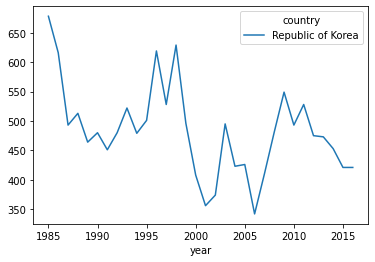

Cluster 9 number of entries 1


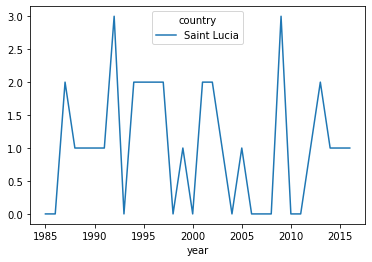

Cluster 7 number of entries 1


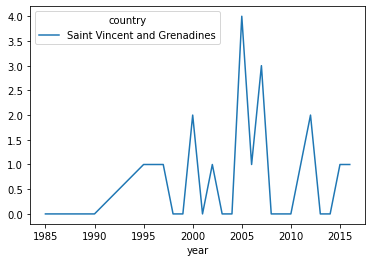

Cluster 6 number of entries 1


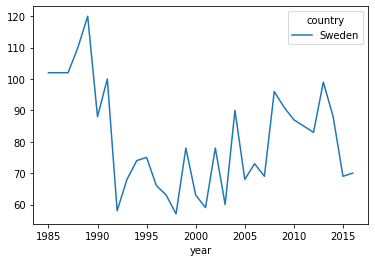

Cluster 8 number of entries 1


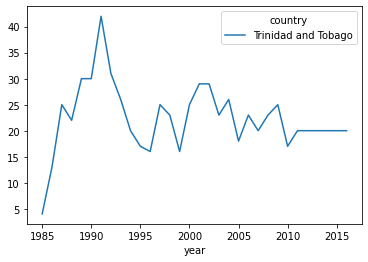

In [ ]:
print_clusters(inter_ts.T, Z2, 10, True)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  5  1  1  1  1  1  1  1  9
  1  7  1  1  4  1  1 10  1  1  1  1  1  3  1  1  1  6  1  1  1  1  8  1
  1  1  1  1  1  1  2  1  1]
Cluster 1 number of entries 48


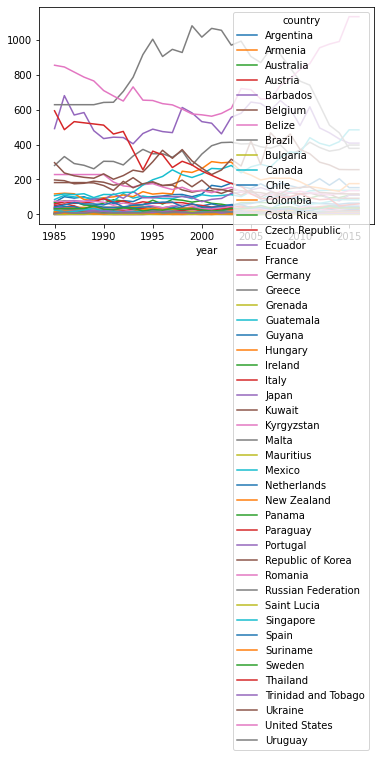

Cluster 5 number of entries 1


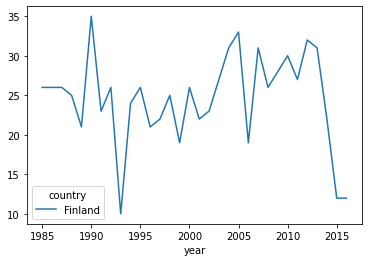

Cluster 9 number of entries 1


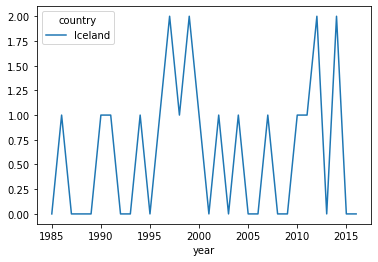

Cluster 7 number of entries 1


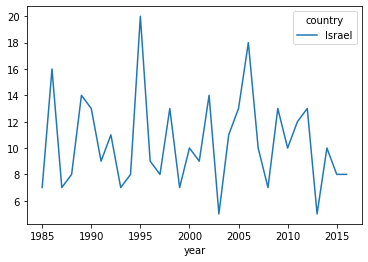

Cluster 4 number of entries 1


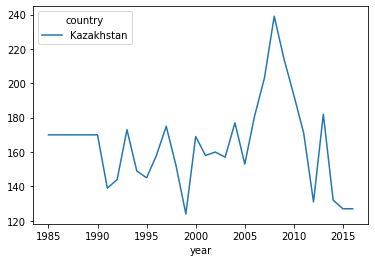

Cluster 10 number of entries 1


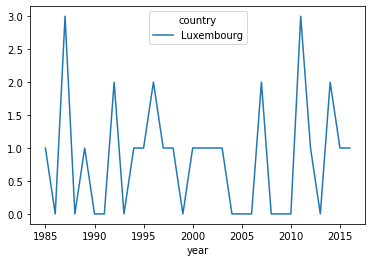

Cluster 3 number of entries 1


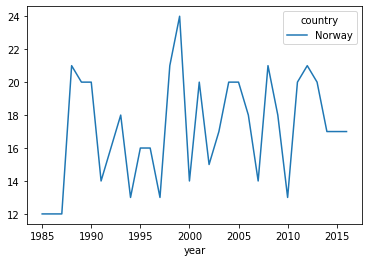

Cluster 6 number of entries 1


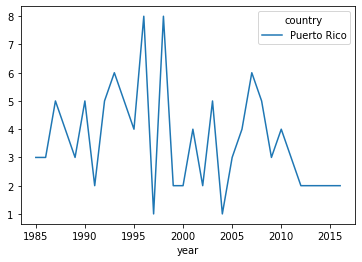

Cluster 8 number of entries 1


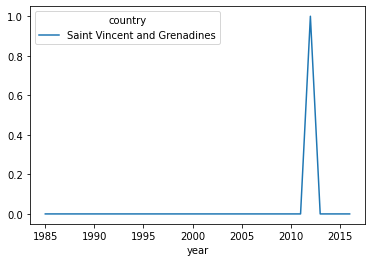

Cluster 2 number of entries 1


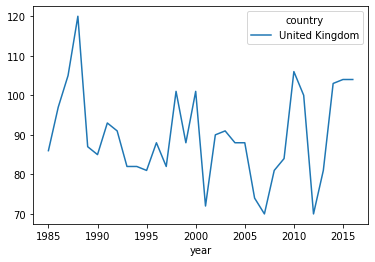

In [ ]:
print_clusters(inter_ts_fem.T, Z2_f, 10, True)

### For the case of simple-DTW:


[ 4  1  1  1  1  1  1  6  1  2  1  2  1  1  1  1  2  2  1  1  1  1  1  1
  1  1  1  8  2  1  1  1  1  1  7  1  1  1  1  1  1  1  2  1  9  1  1  1
  1  1  1  3  1  5  2 10  1]
Cluster 4 number of entries 1


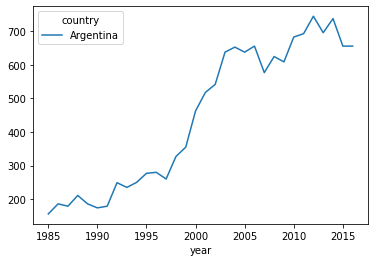

Cluster 1 number of entries 42


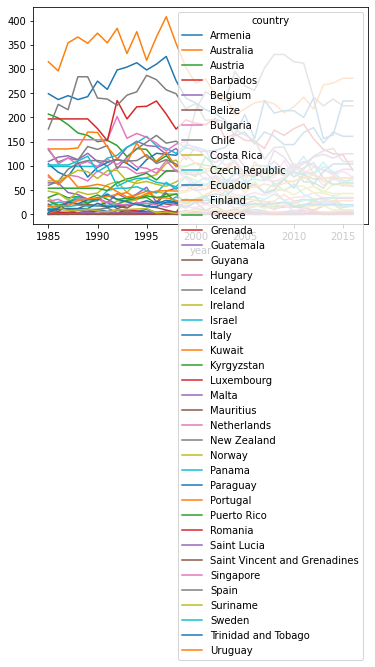

Cluster 6 number of entries 1


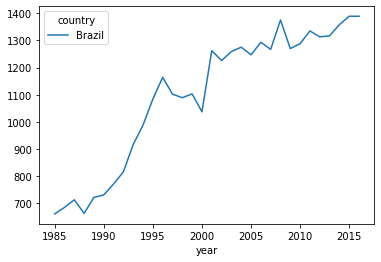

Cluster 2 number of entries 7


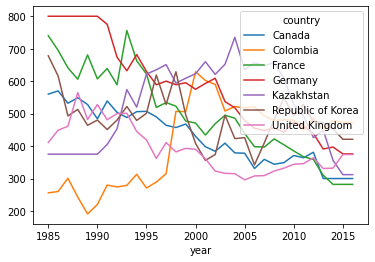

Cluster 8 number of entries 1


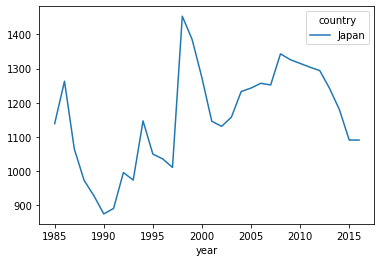

Cluster 7 number of entries 1


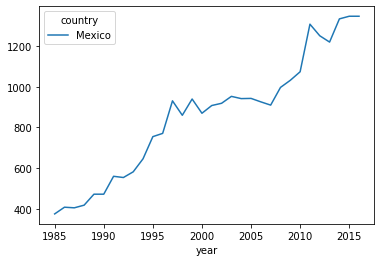

Cluster 9 number of entries 1


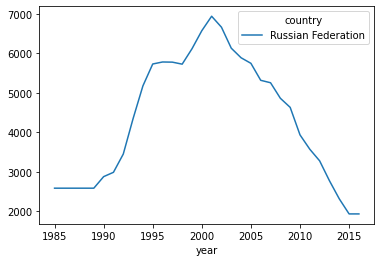

Cluster 3 number of entries 1


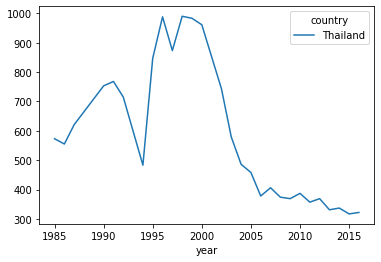

Cluster 5 number of entries 1


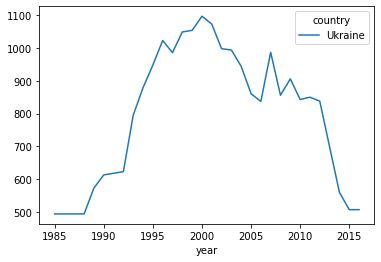

Cluster 10 number of entries 1


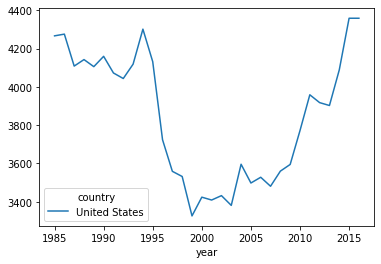

In [ ]:
print_clusters(inter_ts.T, Z3, 10, True)

[ 2  2  2  2  2  2  2  4  2  2  2  3  2  2  2  2  1  1  2  2  2  2  2  2
  2  2  2  8  1  2  2  2  2  2  6  2  2  2  2  2  2  2  5  2  9  2  2  2
  2  2  2  7  2  1  2 10  2]
Cluster 2 number of entries 45


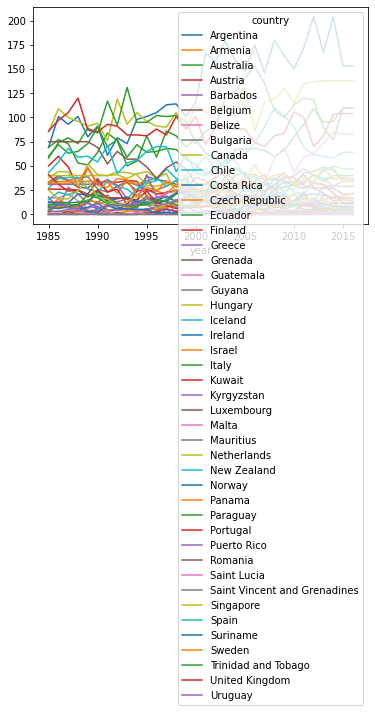

Cluster 4 number of entries 1


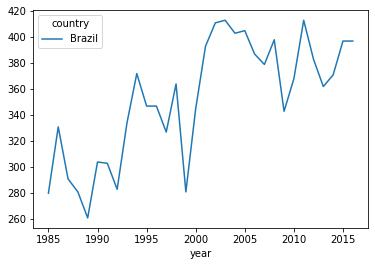

Cluster 3 number of entries 1


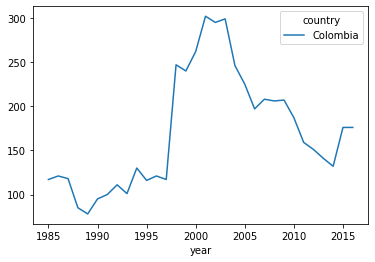

Cluster 1 number of entries 4


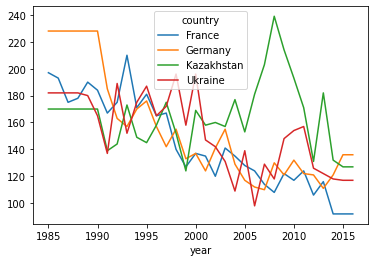

Cluster 8 number of entries 1


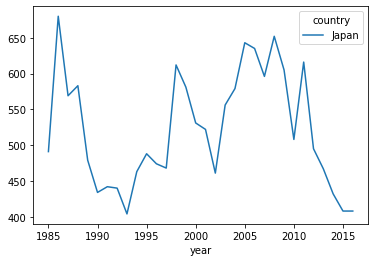

Cluster 6 number of entries 1


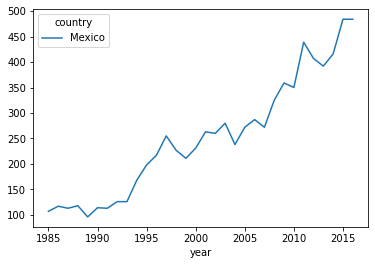

Cluster 5 number of entries 1


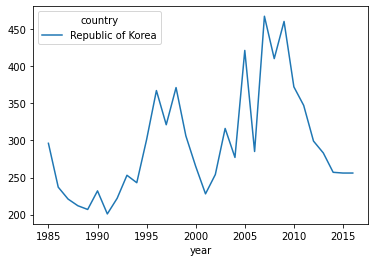

Cluster 9 number of entries 1


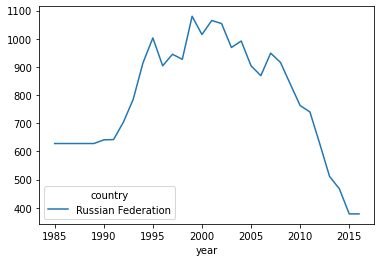

Cluster 7 number of entries 1


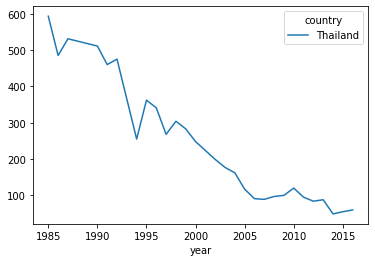

Cluster 10 number of entries 1


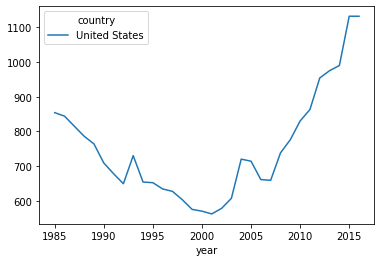

In [ ]:
print_clusters(inter_ts_fem.T, Z3_f, 10, True)